In [2]:
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [3]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/krista/'

In [4]:
!pwd
write_dir = home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/Krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [4]:
all_sim_data = hddm.load_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [5]:
all_sim_data.head(10)

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,...,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,trial,ideal_B,B_ideal_target,B_nonideal_target
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,0.700,False,0,761,...,1,0.000000,0.000000,2.528877,0.000000,0,1,0.000000,0.000000,0.000000
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,0.700,False,0,761,...,1,1.390214,0.149207,0.000000,3.978021,1,2,-1.241007,0.149207,1.390214
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,0.700,False,0,761,...,1,0.792372,0.196591,0.000000,2.754457,0,3,-0.595781,0.196591,0.792372
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,0.172,False,0,761,...,1,0.532802,0.226667,0.000000,3.330826,0,4,-0.306135,0.226667,0.532802
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,0.172,False,0,761,...,1,0.391376,0.251982,0.000000,2.527291,0,5,-0.139394,0.251982,0.391376
5,0.268538,-0.139394,0.139394,0,-1.000000,0.518539,0.172,False,0,761,...,1,0.302804,0.275119,3.036967,0.000000,1,6,-0.027685,0.275119,0.302804
6,0.035630,-0.027685,0.027685,0,-1.000000,0.768538,0.172,False,0,761,...,1,1.408409,0.604046,0.000000,3.361235,1,7,-0.804363,0.604046,1.408409
7,0.785155,-0.804363,0.804363,0,-1.000000,0.535630,0.172,False,0,761,...,1,0.571150,0.635969,4.661588,0.000000,1,8,0.064818,0.635969,0.571150
8,0.352873,0.064818,-0.064818,0,-1.000000,1.285155,0.172,False,0,761,...,1,4.114561,1.314367,-0.099227,0.000000,0,9,-2.800194,1.314367,4.114561
9,0.206726,-2.800194,2.800194,0,-0.935182,0.852873,0.192,False,0,761,...,1,0.822059,1.379872,4.103838,0.000000,0,10,0.557813,1.379872,0.822059


In [6]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,...,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,trial,ideal_B,B_ideal_target,B_nonideal_target
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,0.700,False,0,761,...,1,0.000000,0.000000,2.528877,0.000000,0,1,0.000000,0.000000,0.000000
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,0.700,False,0,761,...,1,1.390214,0.149207,0.000000,3.978021,1,2,-1.241007,0.149207,1.390214
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,0.700,False,0,761,...,1,0.792372,0.196591,0.000000,2.754457,0,3,-0.595781,0.196591,0.792372
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,0.172,False,0,761,...,1,0.532802,0.226667,0.000000,3.330826,0,4,-0.306135,0.226667,0.532802
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,0.172,False,0,761,...,1,0.391376,0.251982,0.000000,2.527291,0,5,-0.139394,0.251982,0.391376


In [7]:
all_sim_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'rt',
       'acc', 'subj_idx', 'ID', 'cond', 'id_choices', 'correct_id_choices',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'trial', 'ideal_B',
       'B_ideal_target', 'B_nonideal_target'],
      dtype='object')

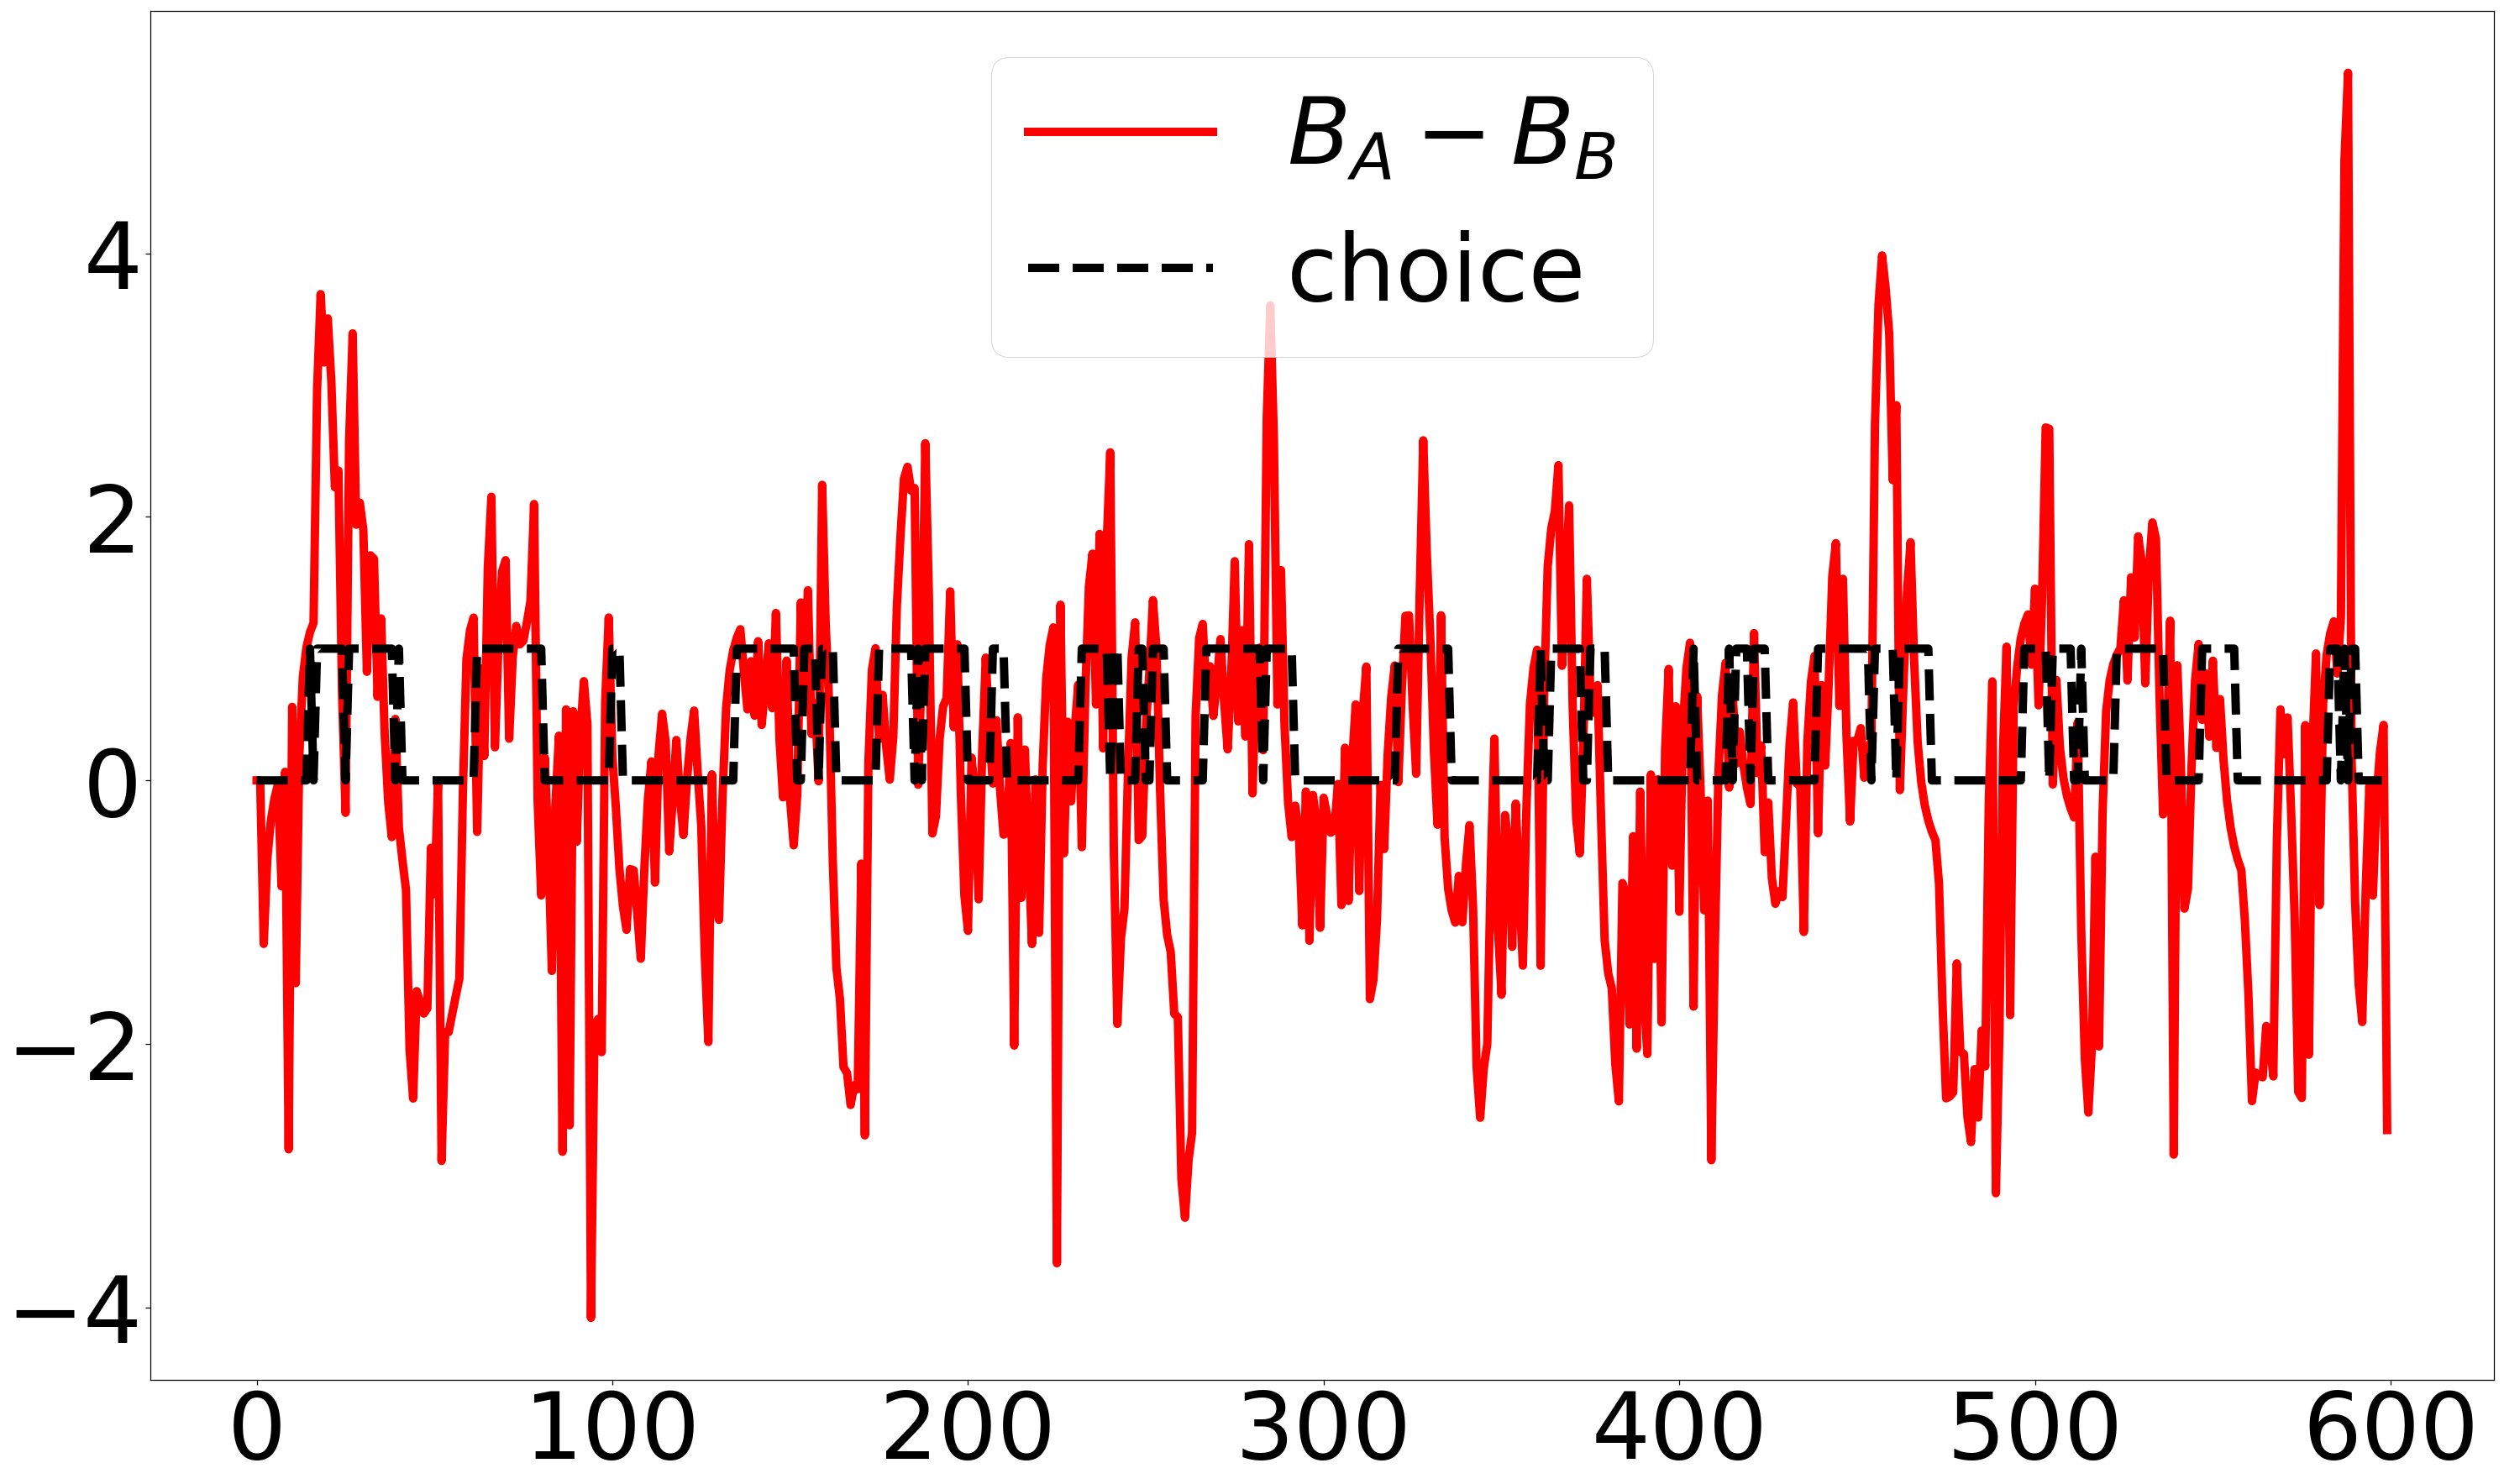

In [8]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.target_B[0:600], 'r', label='$B_{A} - B_{B}$')
plt.plot(all_sim_data.id_choices[0:600], 'k--', label='choice')
plt.legend()

Text(0,0.5,'$B_{choice} - B_{nonchoice}$')

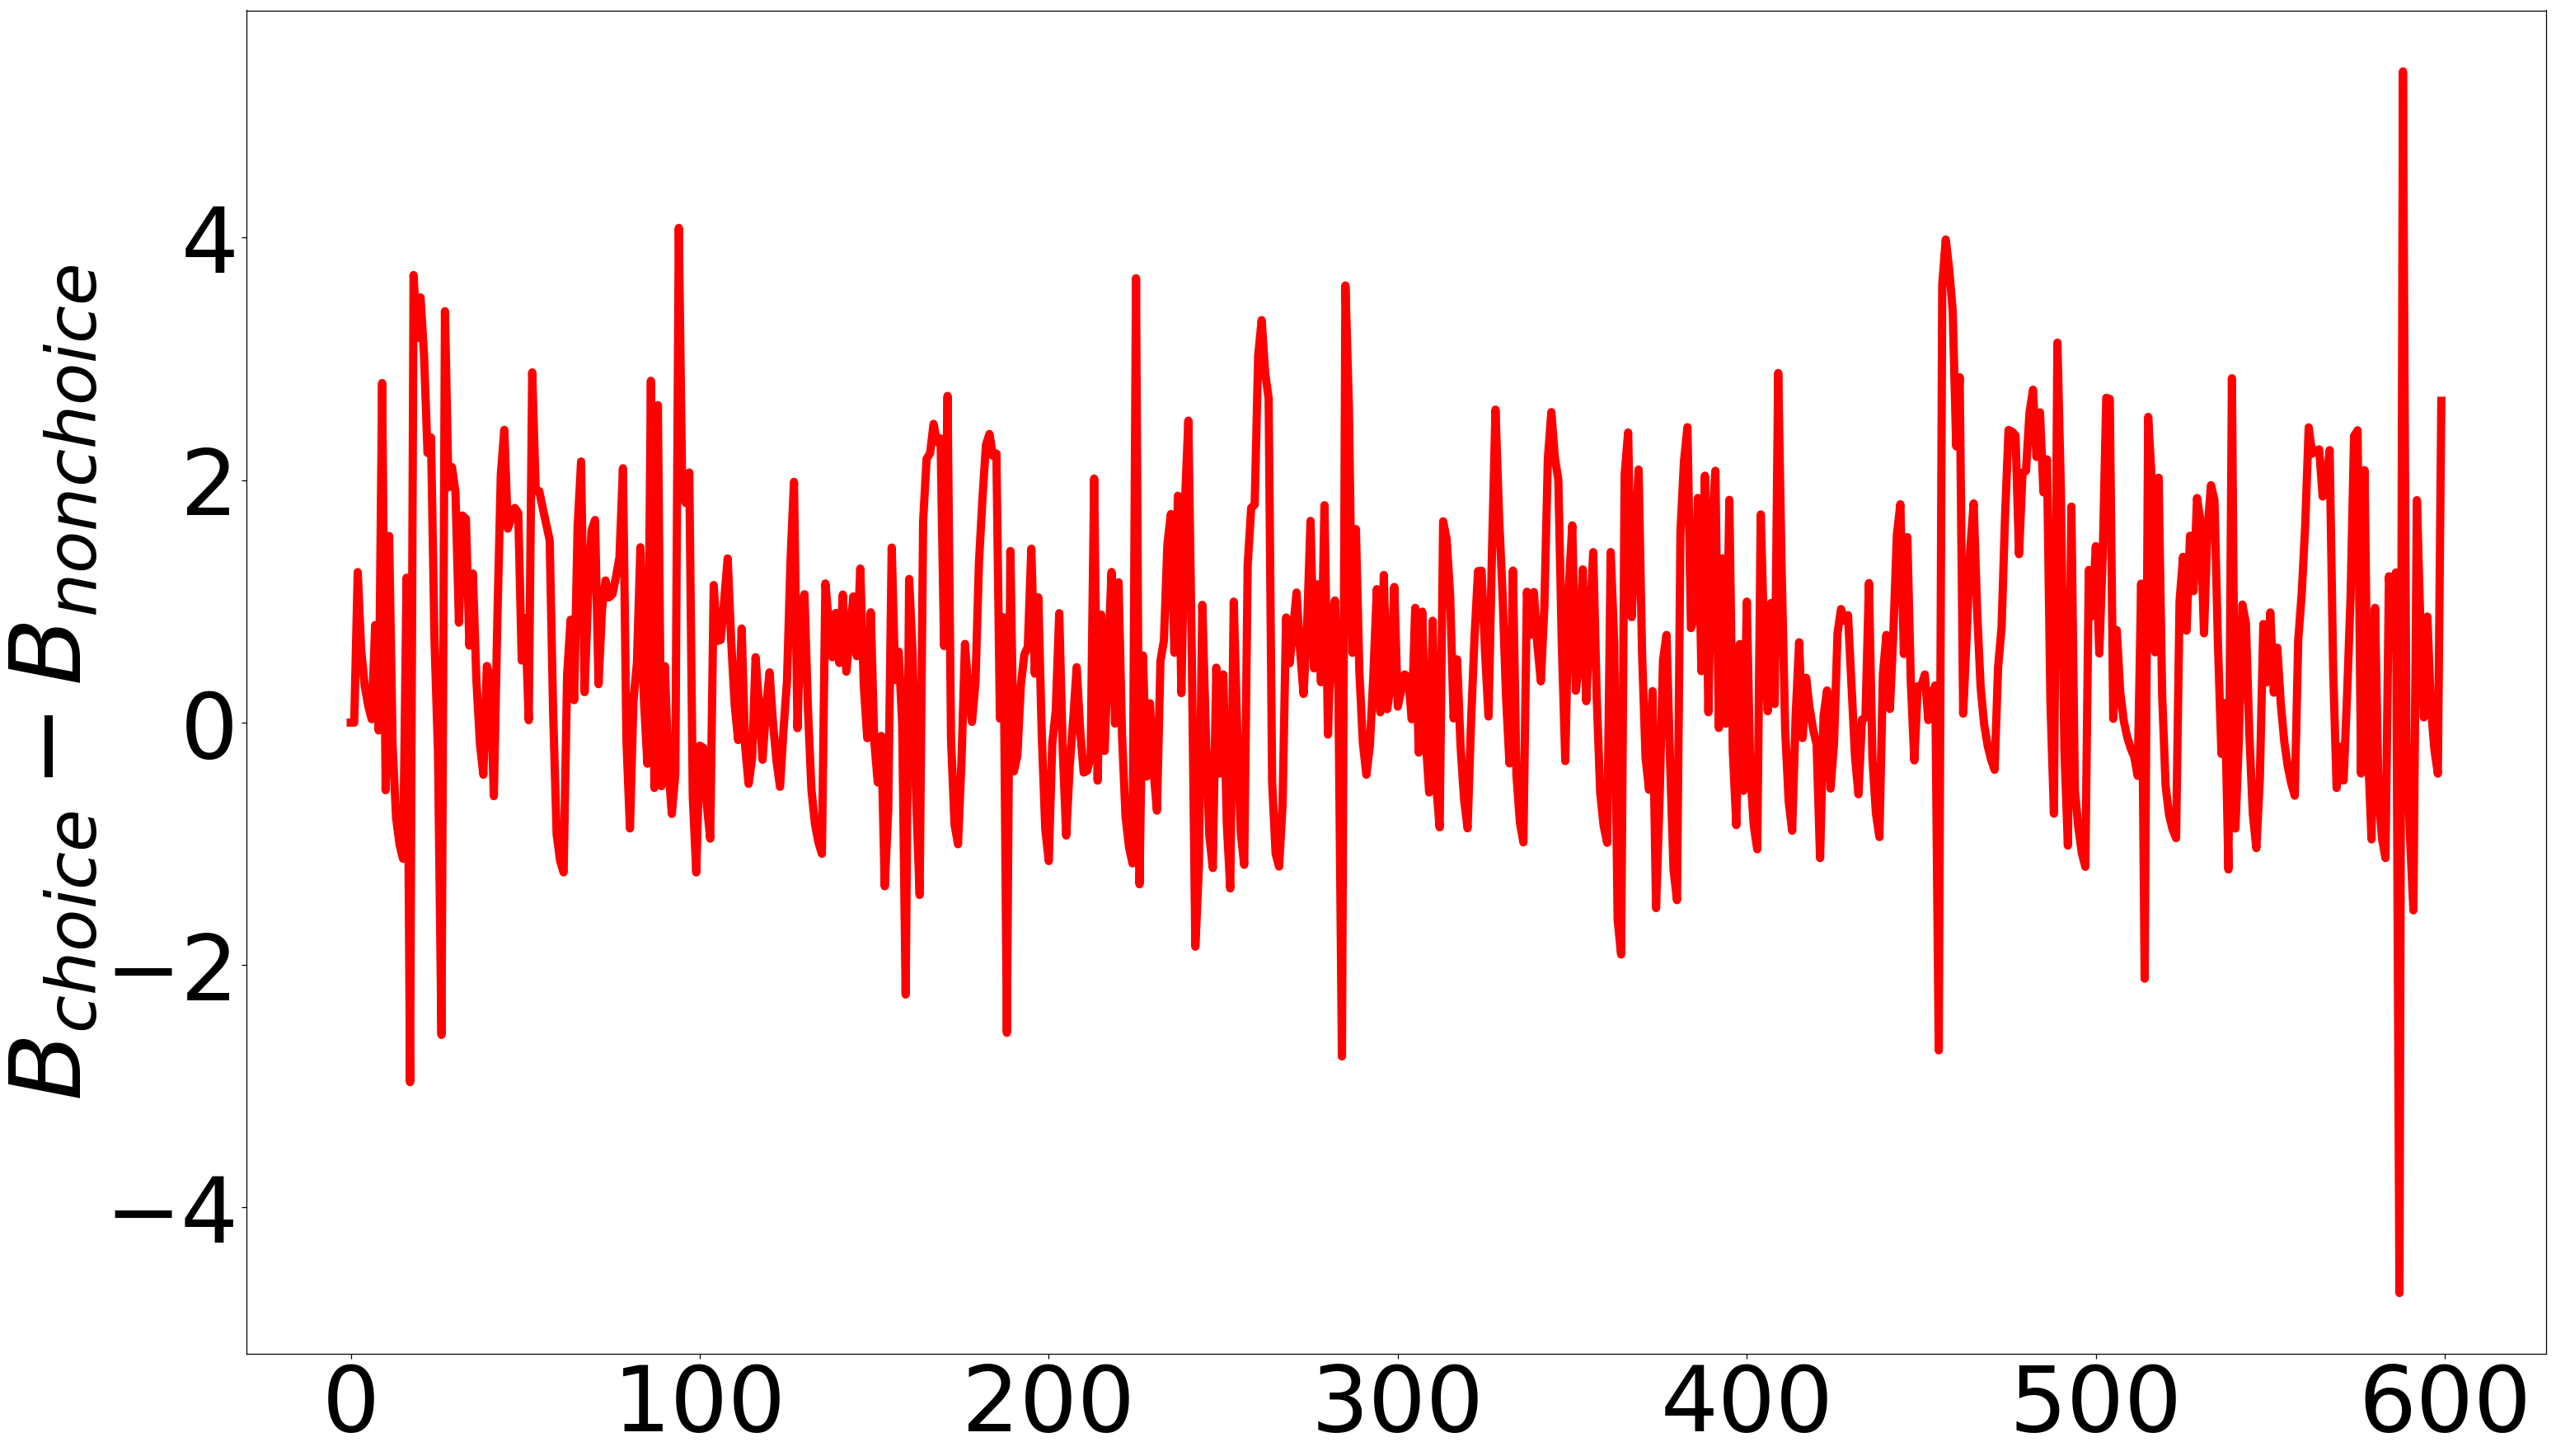

In [9]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.choice_B[0:600], 'r')
plt.ylabel('$B_{choice} - B_{nonchoice}$')

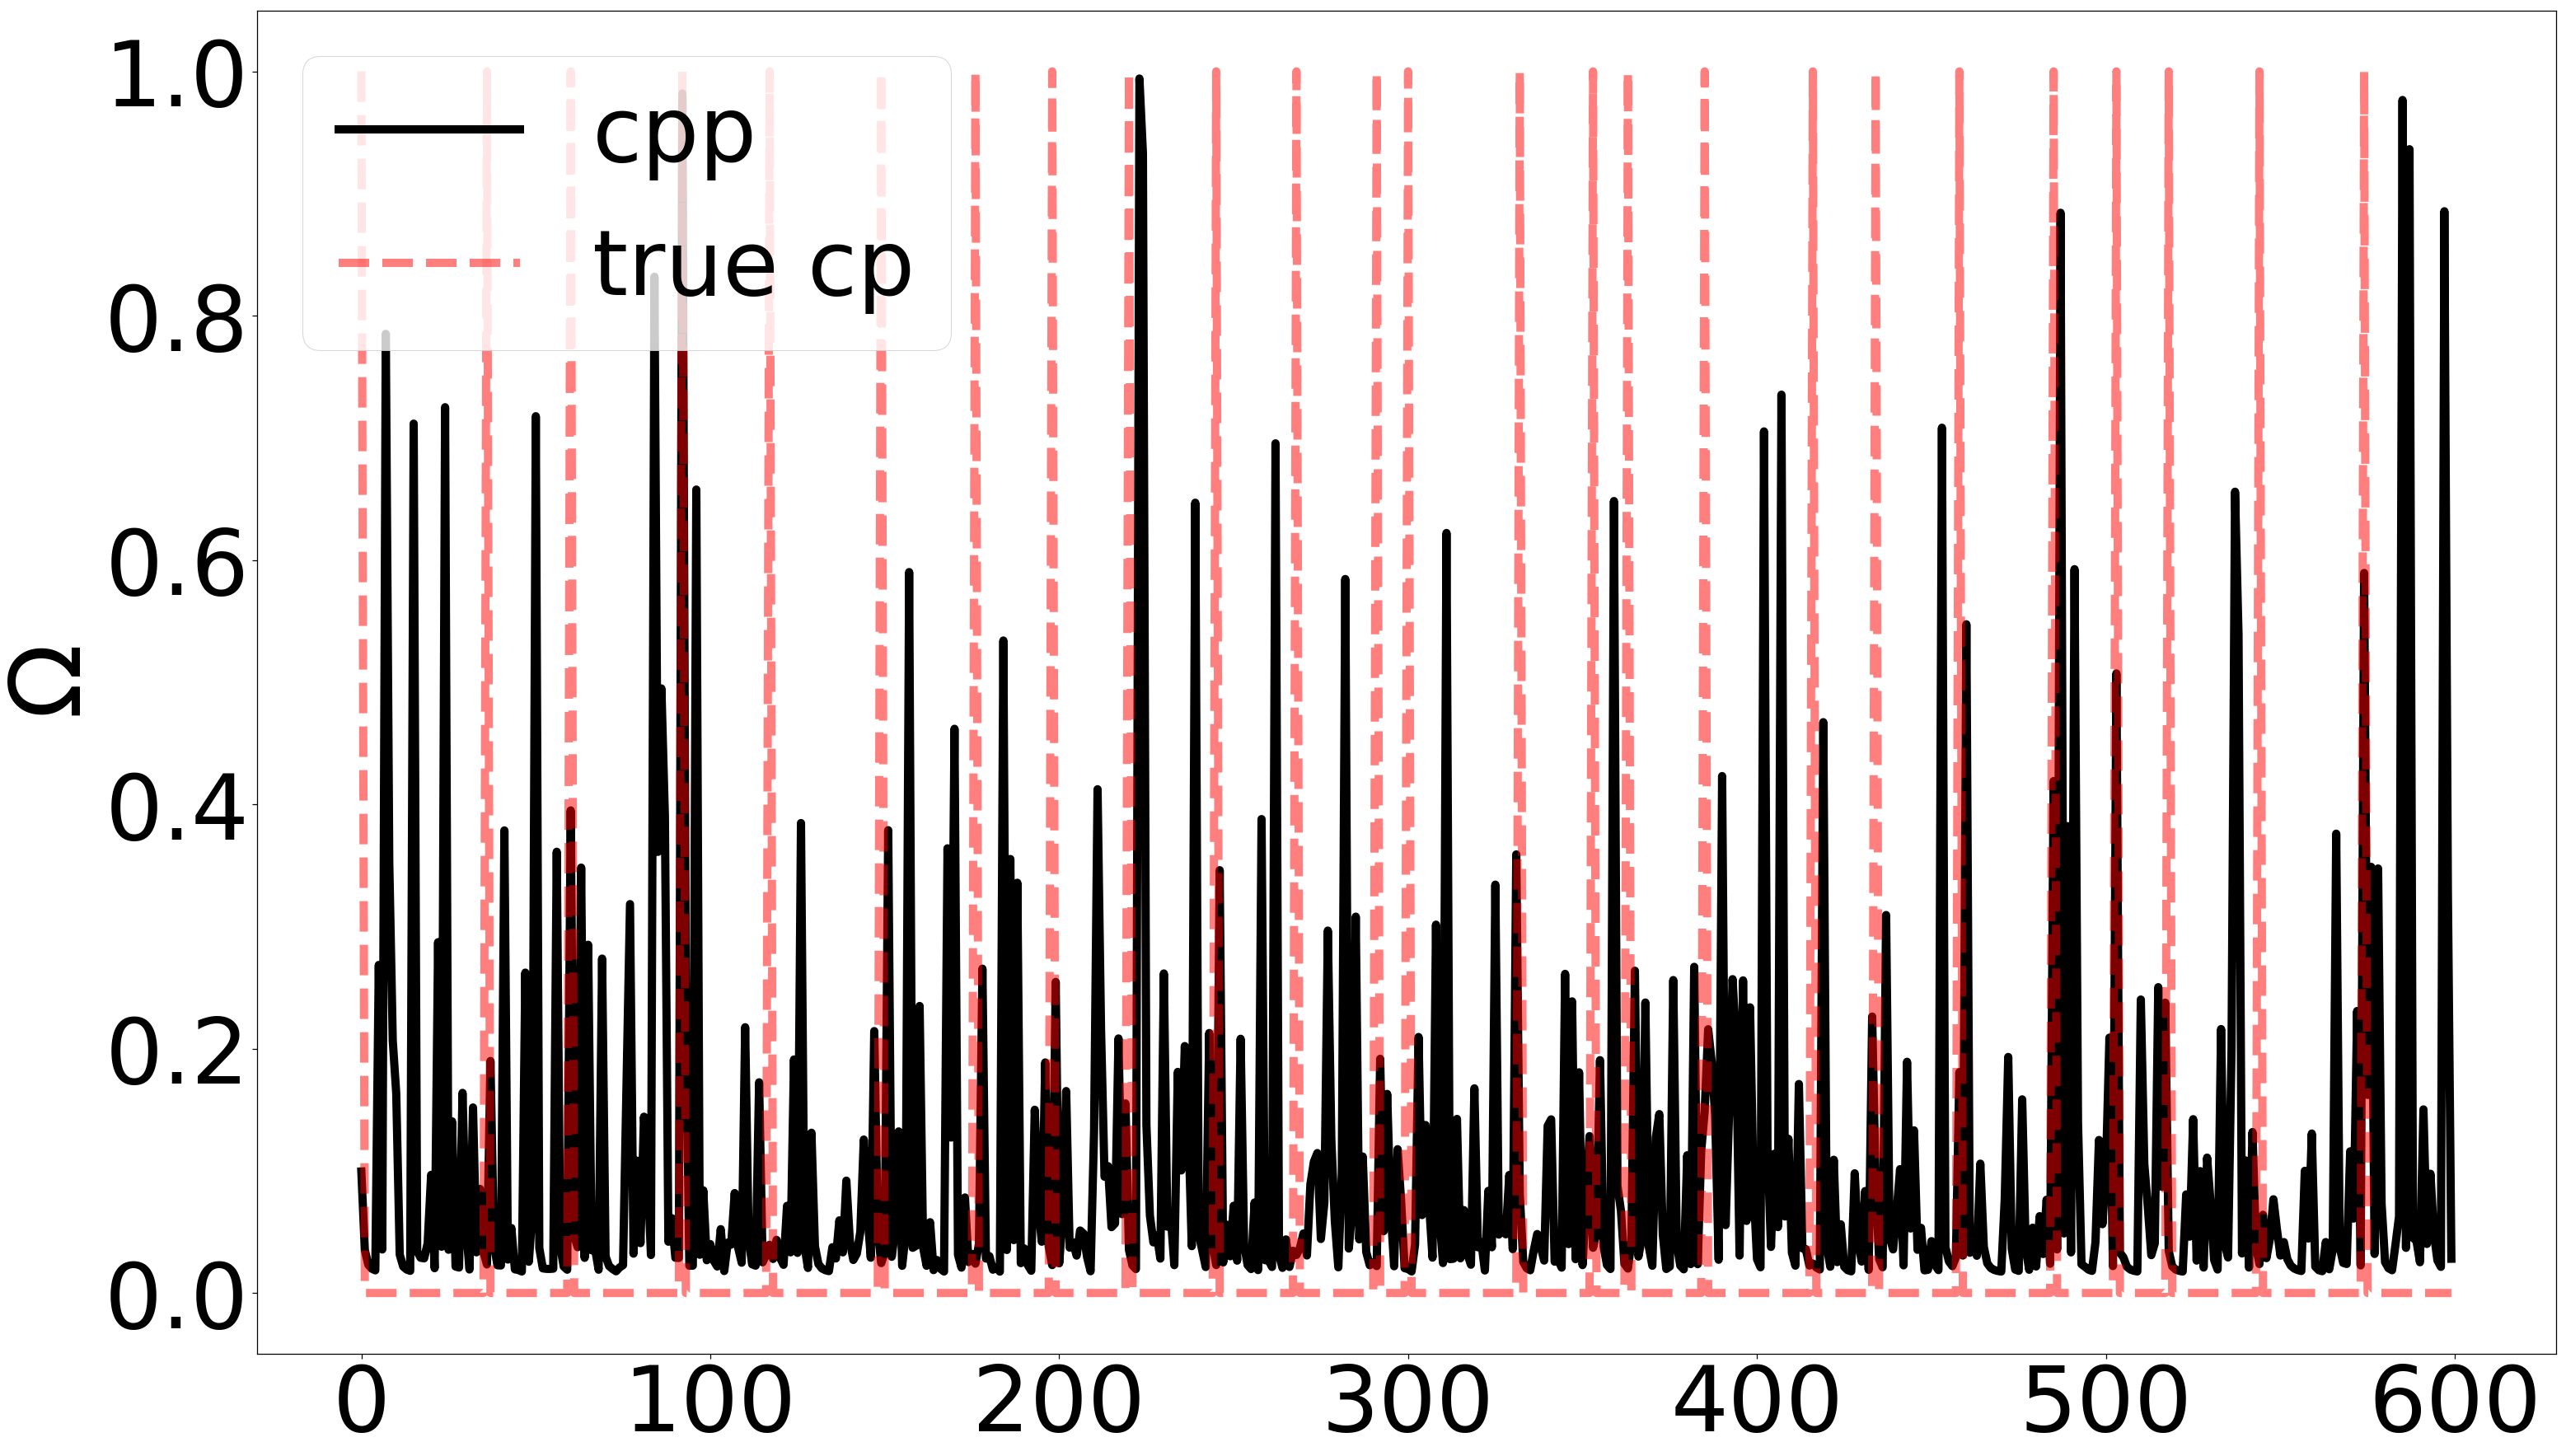

In [10]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.cpp[0:600], 'k', label='cpp')
plt.plot(all_sim_data.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [11]:
#use target choice as response 
#include correct target choice as stimulus 
all_sim_data = all_sim_data.rename(index=str, columns={"acc": "response", 
                                                       "correct_id_choices": "stimulus"})
all_sim_data = all_sim_data[['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'ideal_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_sim_data = all_sim_data.rename(index=str, columns={'ideal_B': 'B'})
all_sim_data = all_sim_data[(all_sim_data.rt<0.6)]
all_sim_data.reset_index(drop=True, inplace=True)

In [12]:
all_sim_data['cond'] = all_sim_data['cond'].str.strip()
all_sim_data.head()

,response,stimulus,rt,cond,subj_idx,B,cpp
0,False,1,0.172,hc,0,-0.306135,0.019881
1,False,1,0.172,hc,0,-0.139394,0.018539
2,False,1,0.172,hc,0,-0.027685,0.268538
3,False,1,0.172,hc,0,-0.804363,0.035630
4,False,1,0.172,hc,0,0.064818,0.785155


In [13]:
np.unique(all_sim_data.subj_idx), np.unique(all_sim_data.cond)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [14]:
#these are no longer error flipped but stimulus flipped 
# all_sim_data = hddm.utils.flip_errors(all_sim_data)

In [15]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_sim_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [16]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

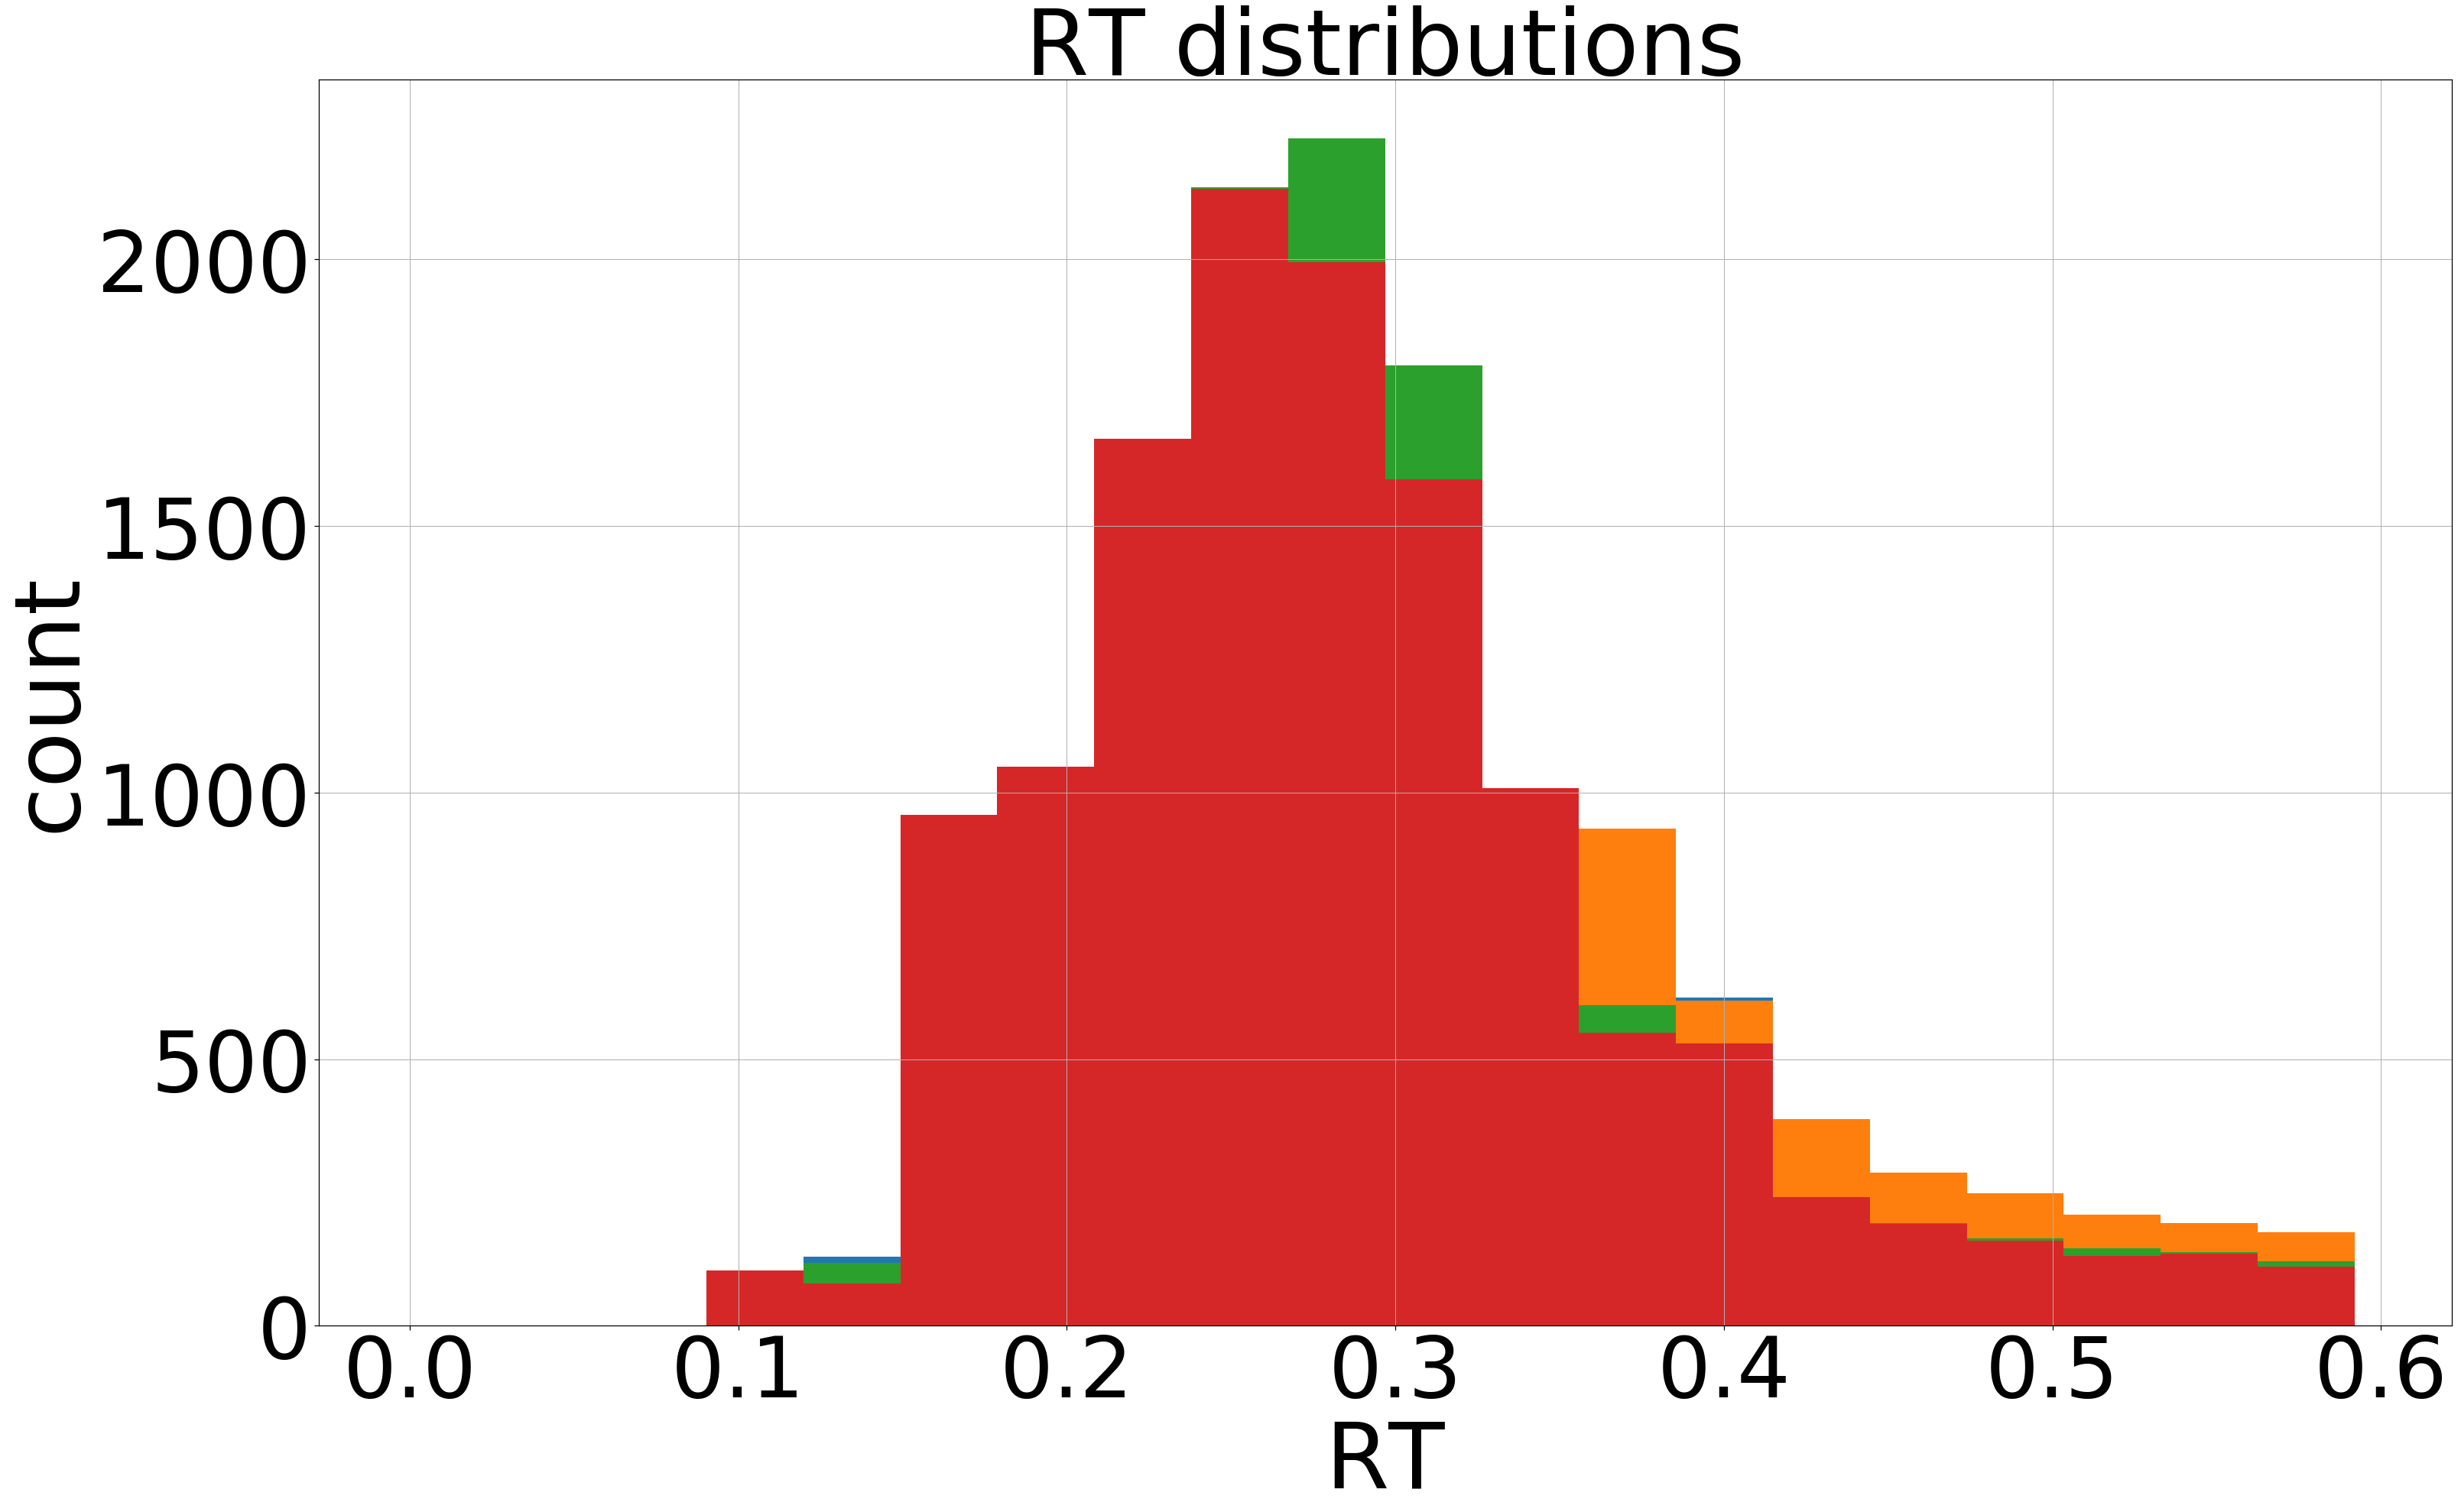

In [17]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('cond'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

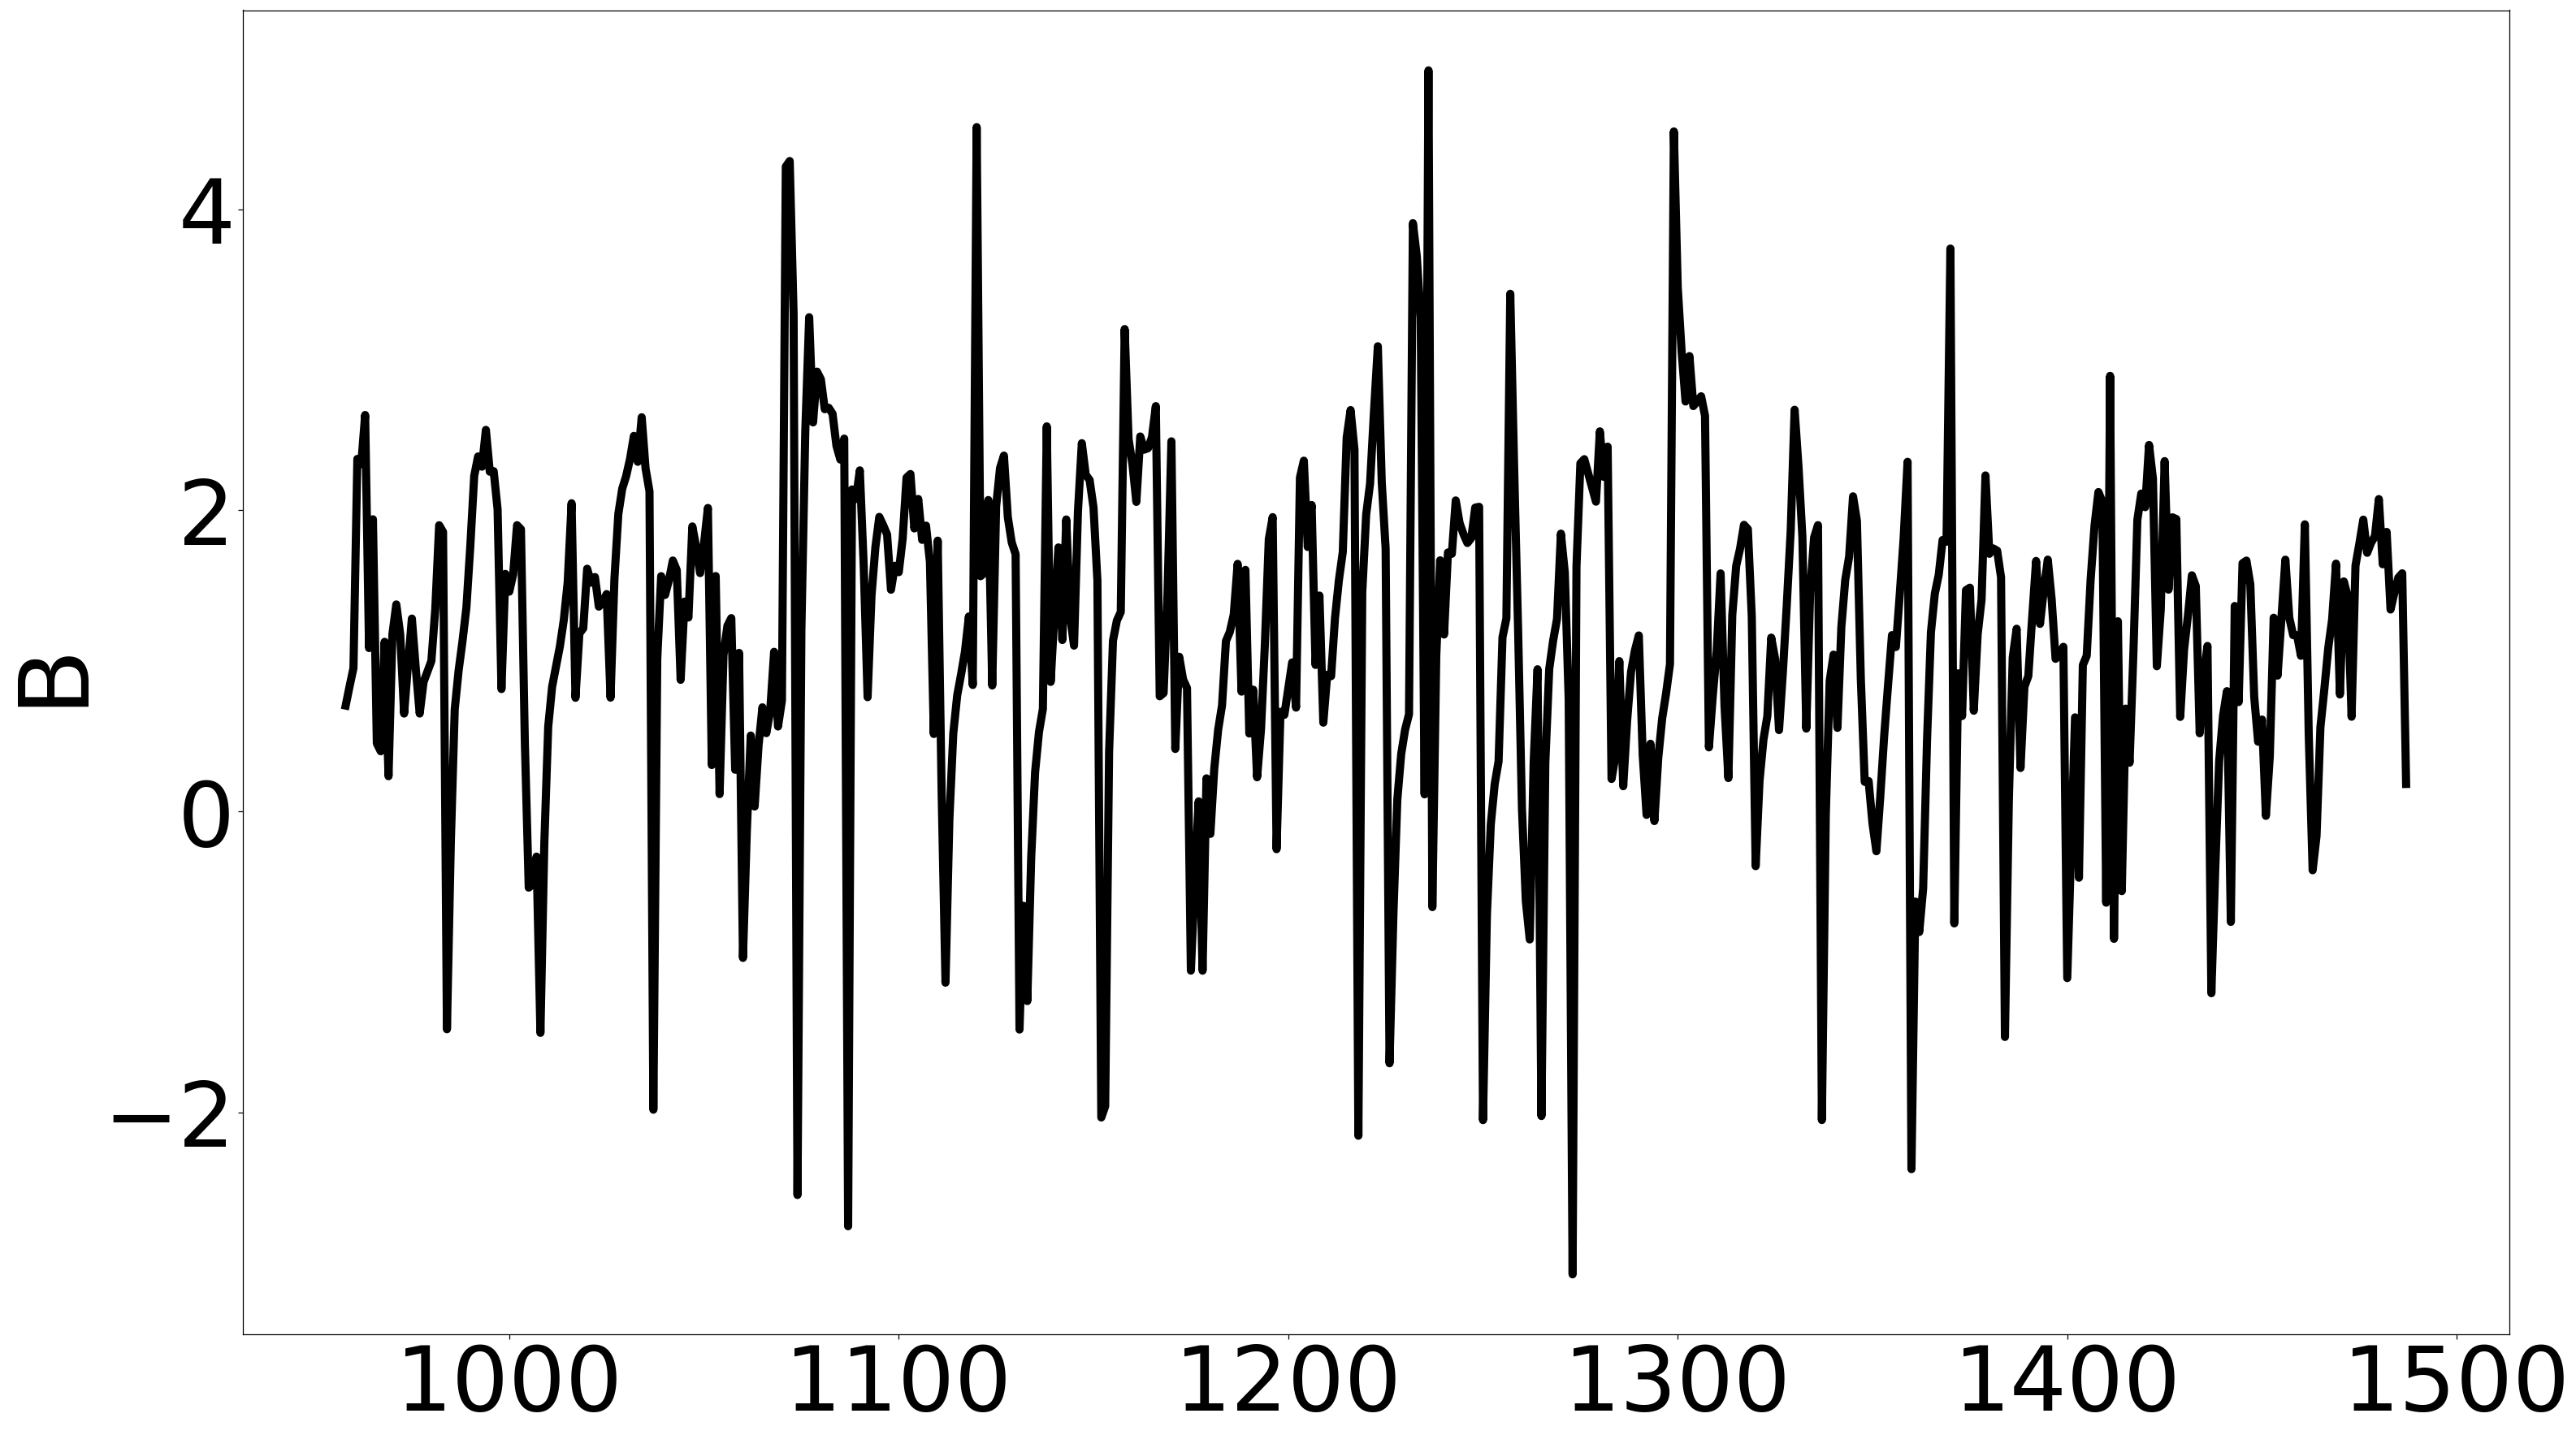

In [18]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.B[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

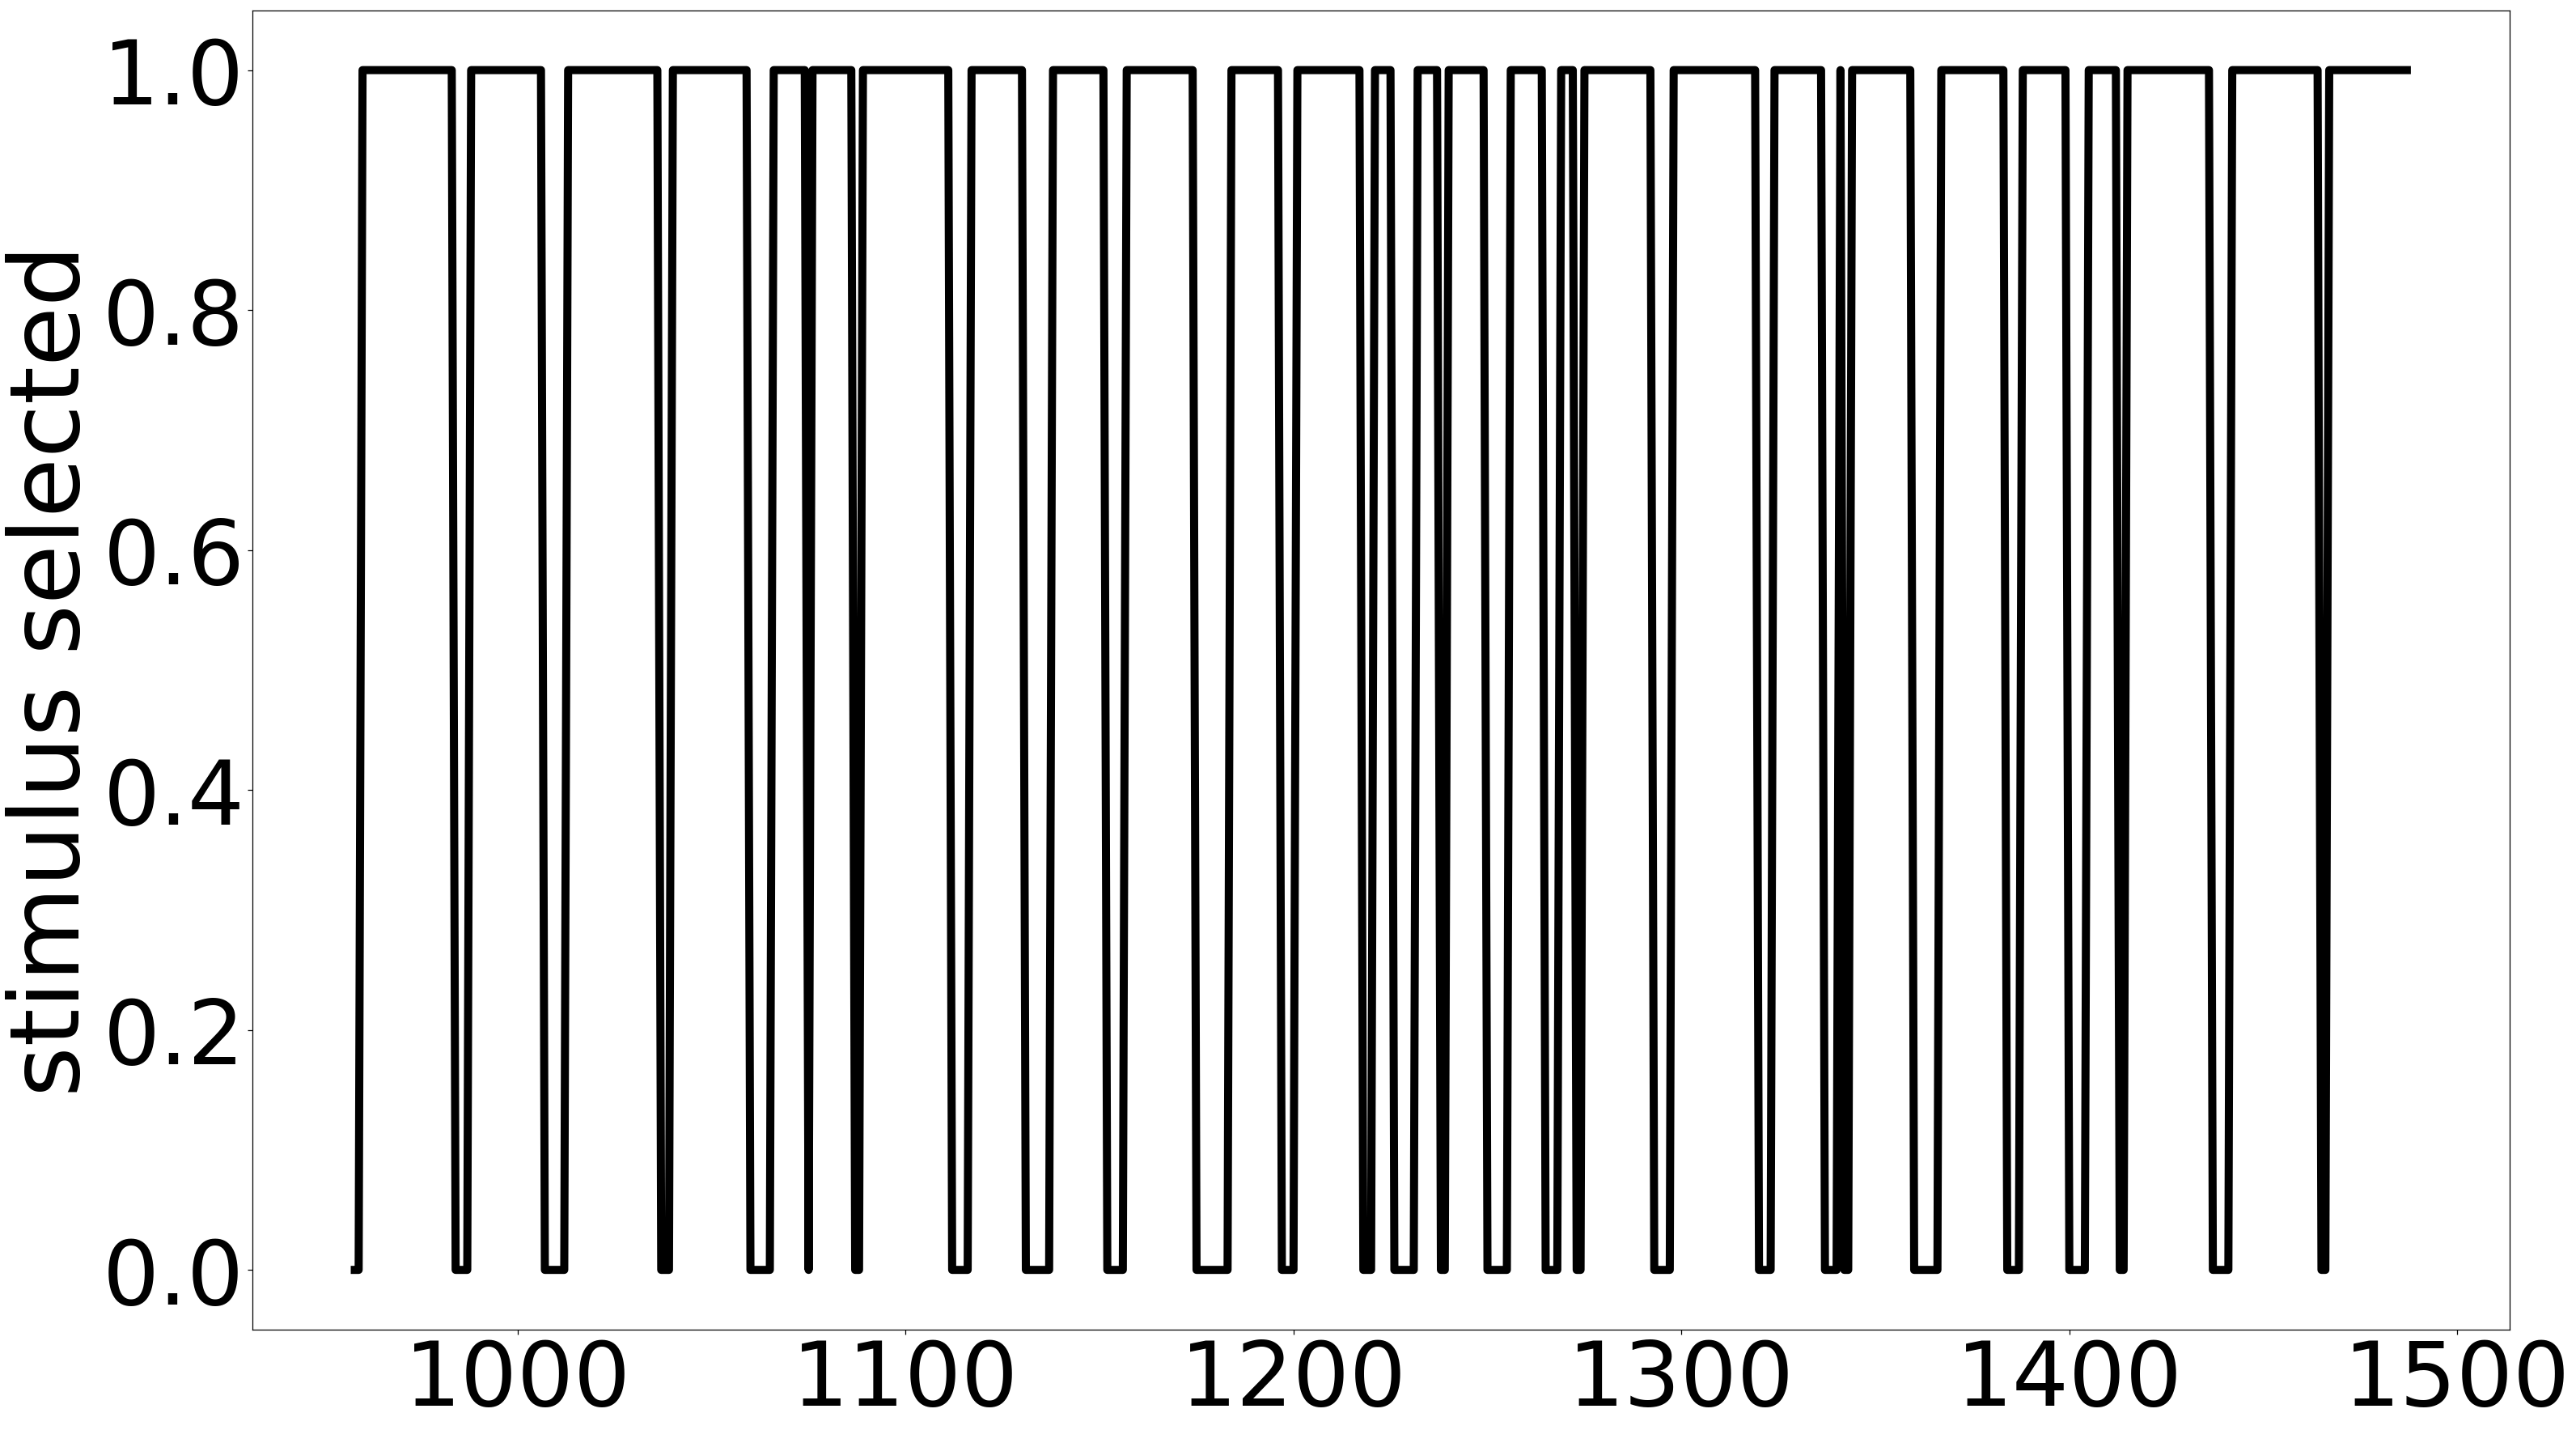

In [19]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.response[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [20]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'simulated rt')

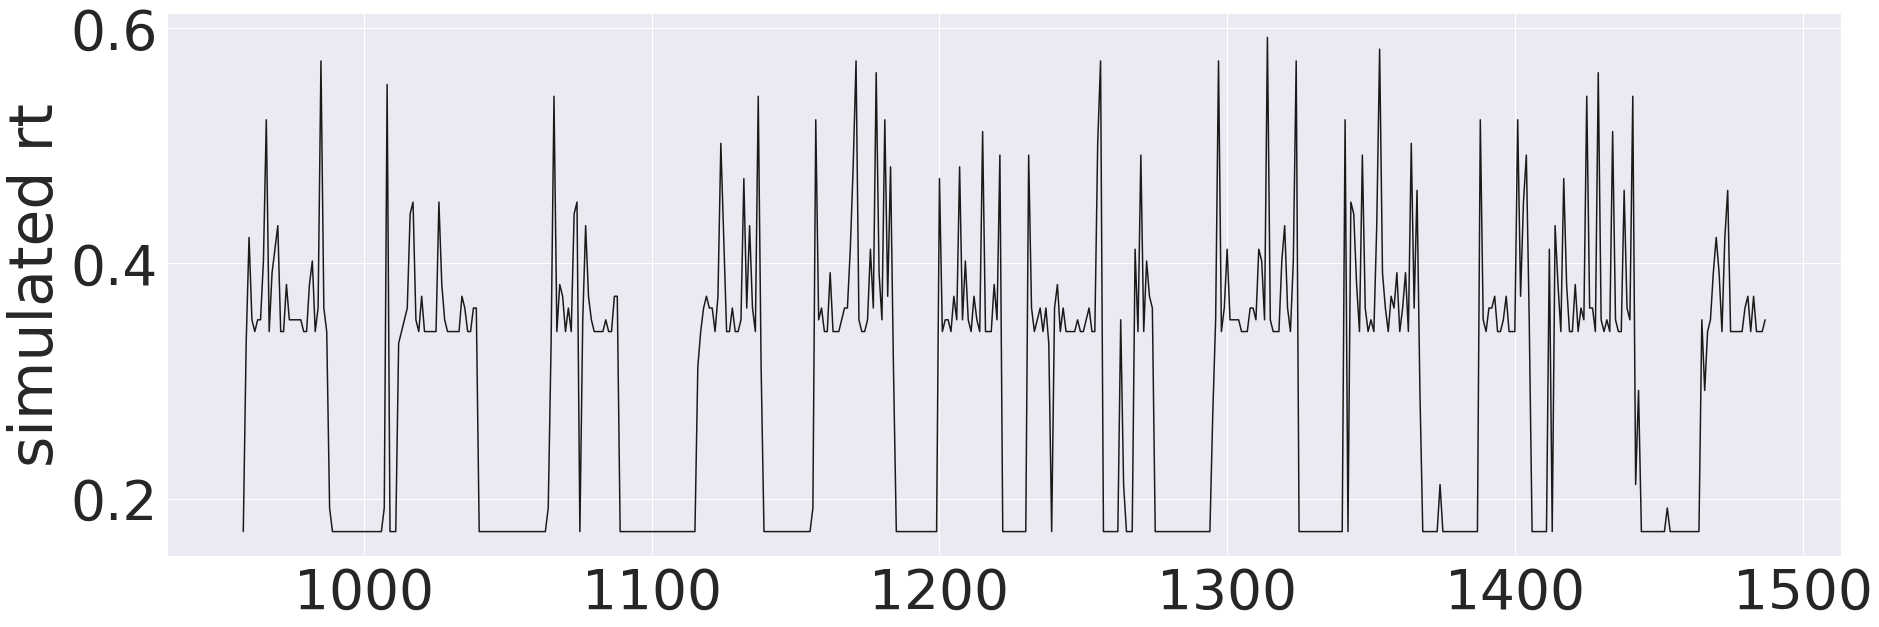

In [21]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_sim_data.rt[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('simulated rt')

Text(0,0.5,'correct stimulus')

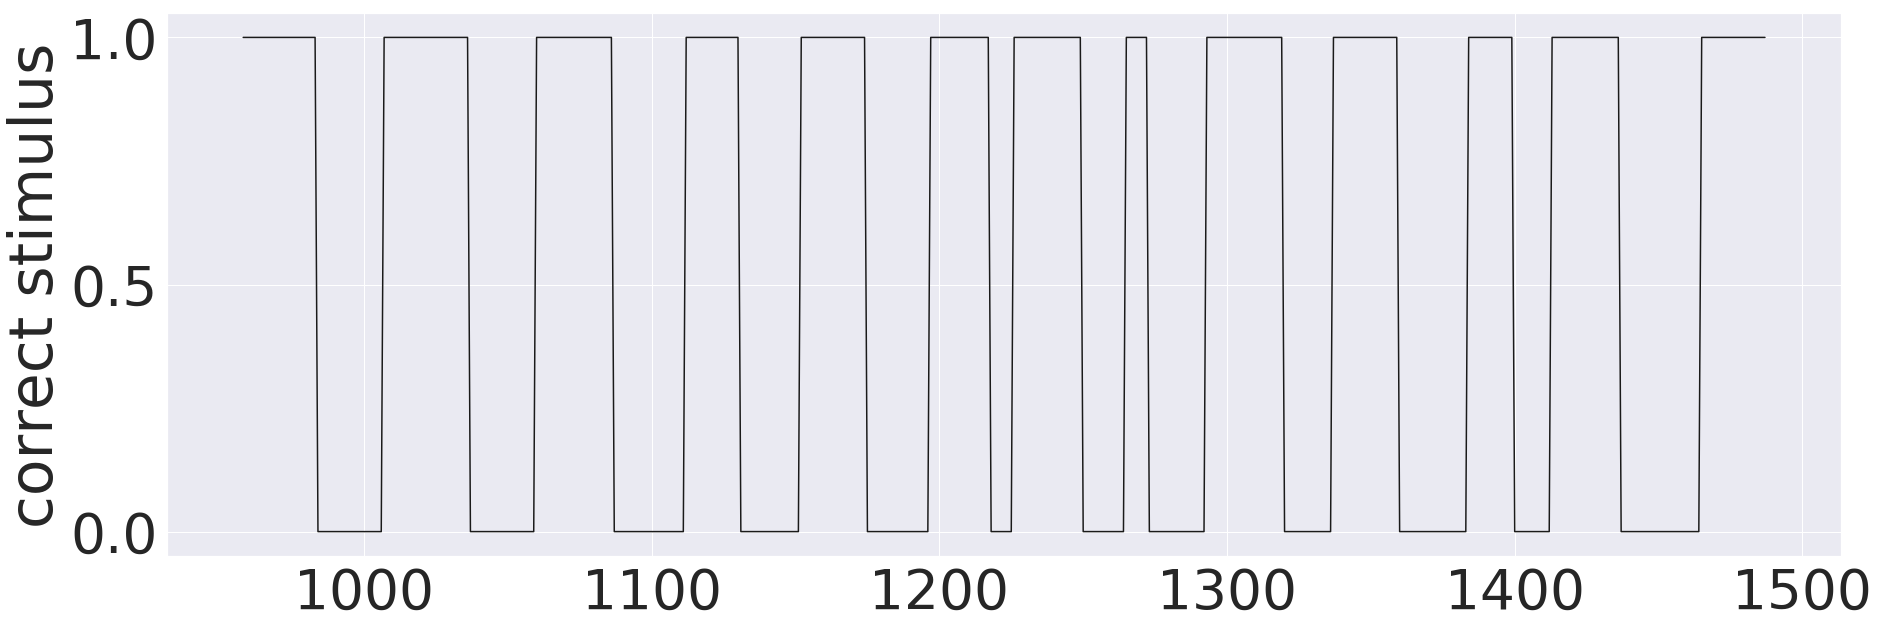

In [22]:
plt.plot(all_sim_data.stimulus[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [23]:
# n_samples, n_burned_samples, n_thin = 500, 50, 3
n_samples, n_burned_samples, n_thin = 1000, 50, 0

In [24]:
# def z_link_func(x, data=all_sim_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return 1 / (1 + np.exp(-(x * stim)))

# def v_link_func(x, data=all_sim_data):f
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return x * stim

In [25]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~','z~']
signals = (('cpp:C(cond)', 'B:C(cond)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'))
[('a~', 't~'), ('a~', 'v~'), ('a~', 'z~'), ('t~', 'a~'), ('t~', 'v~'), ('t~', 'z~'), ('v~', 'a~'), ('v~', 't~'), ('v~', 'z~'), ('z~', 'a~'), ('z~', 't~'), ('z~', 'v~')]


In [26]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [27]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
'a_cpp_z_B': reg_descriptions[2], 't_cpp_a_B': reg_descriptions[3], 
't_cpp_v_B': reg_descriptions[4], 't_cpp_z_B': reg_descriptions[5], 
              'v_cpp_a_B': reg_descriptions[6], 'v_cpp_t_B': reg_descriptions[7],
             'v_cpp_z_B': reg_descriptions[8], 'z_cpp_a_B': reg_descriptions[9],
             'z_cpp_t_B': reg_descriptions[10], 'z_cpp_v_B': reg_descriptions[11]}


[['a~cpp:C(cond)', 't~B:C(cond)'], ['a~cpp:C(cond)', 'v~B:C(cond)'], ['a~cpp:C(cond)', 'z~B:C(cond)'], ['t~cpp:C(cond)', 'a~B:C(cond)'], ['t~cpp:C(cond)', 'v~B:C(cond)'], ['t~cpp:C(cond)', 'z~B:C(cond)'], ['v~cpp:C(cond)', 'a~B:C(cond)'], ['v~cpp:C(cond)', 't~B:C(cond)'], ['v~cpp:C(cond)', 'z~B:C(cond)'], ['z~cpp:C(cond)', 'a~B:C(cond)'], ['z~cpp:C(cond)', 't~B:C(cond)'], ['z~cpp:C(cond)', 'v~B:C(cond)']]


In [28]:
a_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['a~cpp', 't~B'],bias=True)
a_cpp_t_B_sim_reg.find_starting_values()
a_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_t_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['t_Intercept', 't_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2345.6 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [29]:
a_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['a~cpp', 'v~B'], bias=True)
a_cpp_v_B_sim_reg.find_starting_values()
a_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_v_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['v_Intercept', 'v_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1720.2 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [30]:
t_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['t~cpp', 'v~B'], bias=True)
t_cpp_v_B_sim_reg.find_starting_values()
t_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_v_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp']
Adding these covariates:
['v_Intercept', 'v_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2044.7 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [31]:
t_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['t~cpp', 'a~B'],bias=True)
t_cpp_a_B_sim_reg.find_starting_values()
t_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_a_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp']
Adding these covariates:
['a_Intercept', 'a_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1950.4 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [32]:
v_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['v~cpp', 'a~B'], bias=True)
v_cpp_a_B_sim_reg.find_starting_values()
v_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_a_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['a_Intercept', 'a_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1960.9 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [33]:
v_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['v~cpp', 't~B'], bias=True)
v_cpp_t_B_sim_reg.find_starting_values()
v_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_t_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['t_Intercept', 't_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2031.7 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

# All $z$ models 

In [34]:
z_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data, ['z~cpp', 'a~B'], bias=True)
z_cpp_a_B_sim_reg.find_starting_values()
z_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='z_cpp_a_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp']
Adding these covariates:
['a_Intercept', 'a_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1840.6 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [35]:
z_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,['z~cpp', 'v~B'], bias=True)
z_cpp_v_B_sim_reg.find_starting_values()
z_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='z_cpp_v_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp']
Adding these covariates:
['v_Intercept', 'v_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1971.3 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [36]:
z_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data, ['z~cpp', 't~B'], bias=True)
z_cpp_t_B_sim_reg.find_starting_values()
z_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='z_cpp_t_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp']
Adding these covariates:
['t_Intercept', 't_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2149.3 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [37]:
a_cpp_z_B_sim_reg = hddm.HDDMRegressor(all_sim_data,
                                       ['a~cpp', 'z~B'], bias=True)
a_cpp_z_B_sim_reg.find_starting_values()
a_cpp_z_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_z_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['z_Intercept', 'z_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1819.4 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [38]:
v_cpp_z_B_sim_reg = hddm.HDDMRegressor(all_sim_data,
                                      ['v~cpp', 'z~B'
                                      ], bias=True)
v_cpp_z_B_sim_reg.find_starting_values()
v_cpp_z_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_z_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['z_Intercept', 'z_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2189.8 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [39]:
t_cpp_z_B_sim_reg = hddm.HDDMRegressor(all_sim_data,
                                                     ['t~cpp','z~B'], bias=True)
t_cpp_z_B_sim_reg.find_starting_values()
t_cpp_z_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_z_B_sim_reg_acc.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp']
Adding these covariates:
['z_Intercept', 'z_B']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2174.0 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [40]:
#intercept model
intercept_model=['a~1', 't~1', 'v~1', 'z~1'] #true intercept only; "flat", no predictors, but all parameters estimated (all parameters estimated in other reg. models, so only diff. is lack of predictors)
intercept_model = hddm.HDDMRegressor(all_sim_data, intercept_model, bias=True)
intercept_model.find_starting_values()
intercept_model.sample(n_samples, burn=n_burned_samples,  dbname='intercept_only_sim_reg_simple_acc.db',db='pickle')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['t_Intercept']
Adding these covariates:
['v_Intercept']
Adding these covariates:
['z_Intercept']


/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2146.6 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

# Save models

In [41]:
#save models... many many samples, much time
a_cpp_t_B_sim_reg.save(write_dir+'a_cpp_t_B_sim_reg_acc')
a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg_acc')
t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg_acc')

t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg_acc')
v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg_acc')
v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg_acc')

#save z models 
z_cpp_a_B_sim_reg.save(write_dir+'z_cpp_a_B_sim_reg_acc')
z_cpp_v_B_sim_reg.save(write_dir+'z_cpp_v_B_sim_reg_acc')
z_cpp_t_B_sim_reg.save(write_dir+'z_cpp_t_B_sim_reg_acc')

a_cpp_z_B_sim_reg.save(write_dir+'a_cpp_z_B_sim_reg_acc')
v_cpp_z_B_sim_reg.save(write_dir+'v_cpp_z_B_sim_reg_acc')
t_cpp_z_B_sim_reg.save(write_dir+'t_cpp_z_B_sim_reg_acc')

In [5]:
#save models... many many samples, much time
a_cpp_t_B_sim_reg=hddm.load(write_dir+'a_cpp_t_B_sim_reg_acc')
a_cpp_v_B_sim_reg=hddm.load(write_dir+'a_cpp_v_B_sim_reg_acc')
t_cpp_a_B_sim_reg=hddm.load(write_dir+'t_cpp_a_B_sim_reg_acc')

t_cpp_v_B_sim_reg=hddm.load(write_dir+'t_cpp_v_B_sim_reg_acc')
v_cpp_a_B_sim_reg=hddm.load(write_dir+'v_cpp_a_B_sim_reg_acc')
v_cpp_t_B_sim_reg=hddm.load(write_dir+'v_cpp_t_B_sim_reg_acc')

#save z models 
z_cpp_a_B_sim_reg=hddm.load(write_dir+'z_cpp_a_B_sim_reg_acc')
z_cpp_v_B_sim_reg=hddm.load(write_dir+'z_cpp_v_B_sim_reg_acc')
z_cpp_t_B_sim_reg=hddm.load(write_dir+'z_cpp_t_B_sim_reg_acc')

a_cpp_z_B_sim_reg=hddm.load(write_dir+'a_cpp_z_B_sim_reg_acc')
v_cpp_z_B_sim_reg=hddm.load(write_dir+'v_cpp_z_B_sim_reg_acc')
t_cpp_z_B_sim_reg=hddm.load(write_dir+'t_cpp_z_B_sim_reg_acc')

In [ ]:
#test loading
# hddm.load(write_dir+'a_cpp_t_B_sim_reg')
# hddm.load(write_dir+'a_cpp_v_B_sim_reg')
# hddm.load(write_dir+'t_cpp_a_B_sim_reg')

# hddm.load(write_dir+'t_cpp_v_B_sim_reg')
# hddm.load(write_dir+'v_cpp_a_B_sim_reg')
# hddm.load(write_dir+'v_cpp_t_B_sim_reg')

# a_cpp_v_B_sim_reg.save(write_dir+'a_cpp_v_B_sim_reg')
# t_cpp_a_B_sim_reg.save(write_dir+'t_cpp_a_B_sim_reg')

# t_cpp_v_B_sim_reg.save(write_dir+'t_cpp_v_B_sim_reg')
# v_cpp_a_B_sim_reg.save(write_dir+'v_cpp_a_B_sim_reg')
# v_cpp_t_B_sim_reg.save(write_dir+'v_cpp_t_B_sim_reg')

# Plot model fits

In [6]:
dics = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
        t_cpp_v_B_sim_reg.dic, v_cpp_a_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic, 
       z_cpp_a_B_sim_reg.dic, z_cpp_v_B_sim_reg.dic, z_cpp_t_B_sim_reg.dic,
        a_cpp_z_B_sim_reg.dic, v_cpp_z_B_sim_reg.dic,t_cpp_z_B_sim_reg.dic]
m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
            't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
              'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
              'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B']

In [7]:
dics

[-64698.72468688248,
 -76594.405105207989,
 -64709.947730078566,
 -76592.860164150814,
 -64736.149103661213,
 -64704.570942601116,
 -65705.219257063975,
 -77351.01482524391,
 -65681.87934011624,
 -71378.364196535767,
 -71370.243579346352,
 -71373.226655911625]

In [ ]:
# dics = [a_cpp_t_B_sim_reg.dic, a_cpp_v_B_sim_reg.dic,t_cpp_a_B_sim_reg.dic,
#         t_cpp_v_B_sim_reg.dic, v_cpp_a_B_sim_reg.dic, v_cpp_t_B_sim_reg.dic, 
#        z_cpp_a_B_sim_reg.dic, z_cpp_v_B_sim_reg.dic, z_cpp_t_B_sim_reg.dic, 
#         a_cpp_z_B_sim_reg.dic, v_cpp_z_B_sim_reg.dic,t_cpp_z_B_sim_reg.dic]
# m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
#             't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
#               'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
#               'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B']

In [44]:
dics

[-65664.283675820785,
 -77354.135732334486,
 -65665.913092726027,
 -77353.911058994549,
 -65691.519474174071,
 -65667.350527988194,
 -65702.78376712116,
 -77350.586412630204,
 -65680.783459396989,
 -71376.817588911887,
 -71371.475403780511,
 -71372.287950363301]

In [8]:
win_idx = np.where(dics==min(dics))[0]
m_names[win_idx]

'z_cpp & v_B'

In [14]:
v_B_gen = a_cpp_v_B_sim_reg.nodes_db.ix['v_B', 'node']
a_cpp_gen = a_cpp_v_B_sim_reg.nodes_db.ix['a_cpp', 'node']

In [15]:
v_B_sec = t_cpp_v_B_sim_reg.nodes_db.ix['v_B', 'node']
t_cpp_sec = t_cpp_v_B_sim_reg.nodes_db.ix['t_cpp', 'node']

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [11]:
m_names

['a_cpp & t_B',
 'a_cpp & v_B',
 't_cpp & a_B',
 't_cpp & v_B',
 'v_cpp & a_B',
 'v_cpp & t_B',
 'z_cpp & a_B',
 'z_cpp & v_B',
 'z_cpp & t_B',
 'a_cpp & z_B',
 'v_cpp & z_B',
 't_cpp & z_B']

Text(0.5,1,'All pairwise combinations of parameters and learning signals')

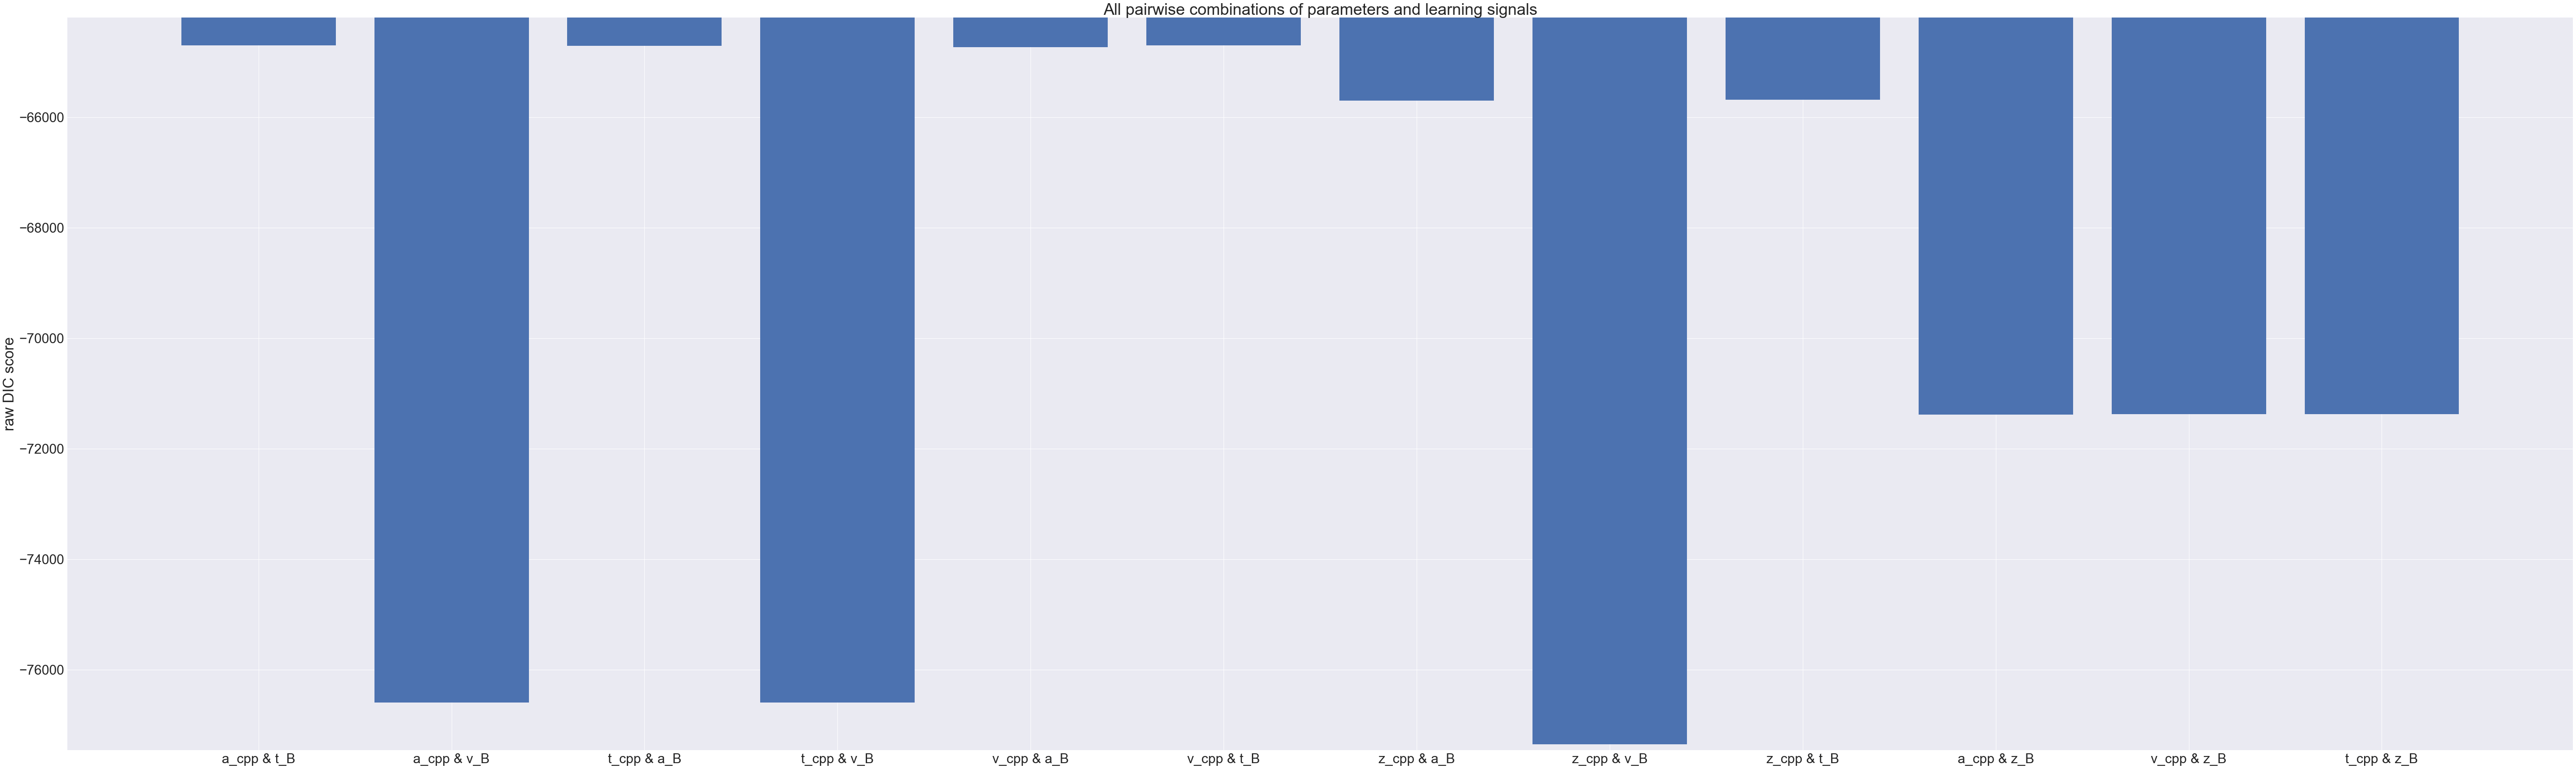

In [10]:
plt.figure(figsize=(100,30))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylim(min(dics) - 100, max(dics) + 500)
plt.ylabel('raw DIC score')
plt.title('All pairwise combinations of parameters and learning signals')

In [23]:
m_names

['a_cpp & t_B',
 'a_cpp & v_B',
 't_cpp & a_B',
 't_cpp & v_B',
 'v_cpp & a_B',
 'v_cpp & t_B',
 'z_cpp & a_B',
 'z_cpp & v_B',
 'z_cpp & t_B',
 'a_cpp & z_B',
 'v_cpp & z_B',
 't_cpp & z_B']

Text(0.5,1,'Simulated: Winning and second-to-winning models')

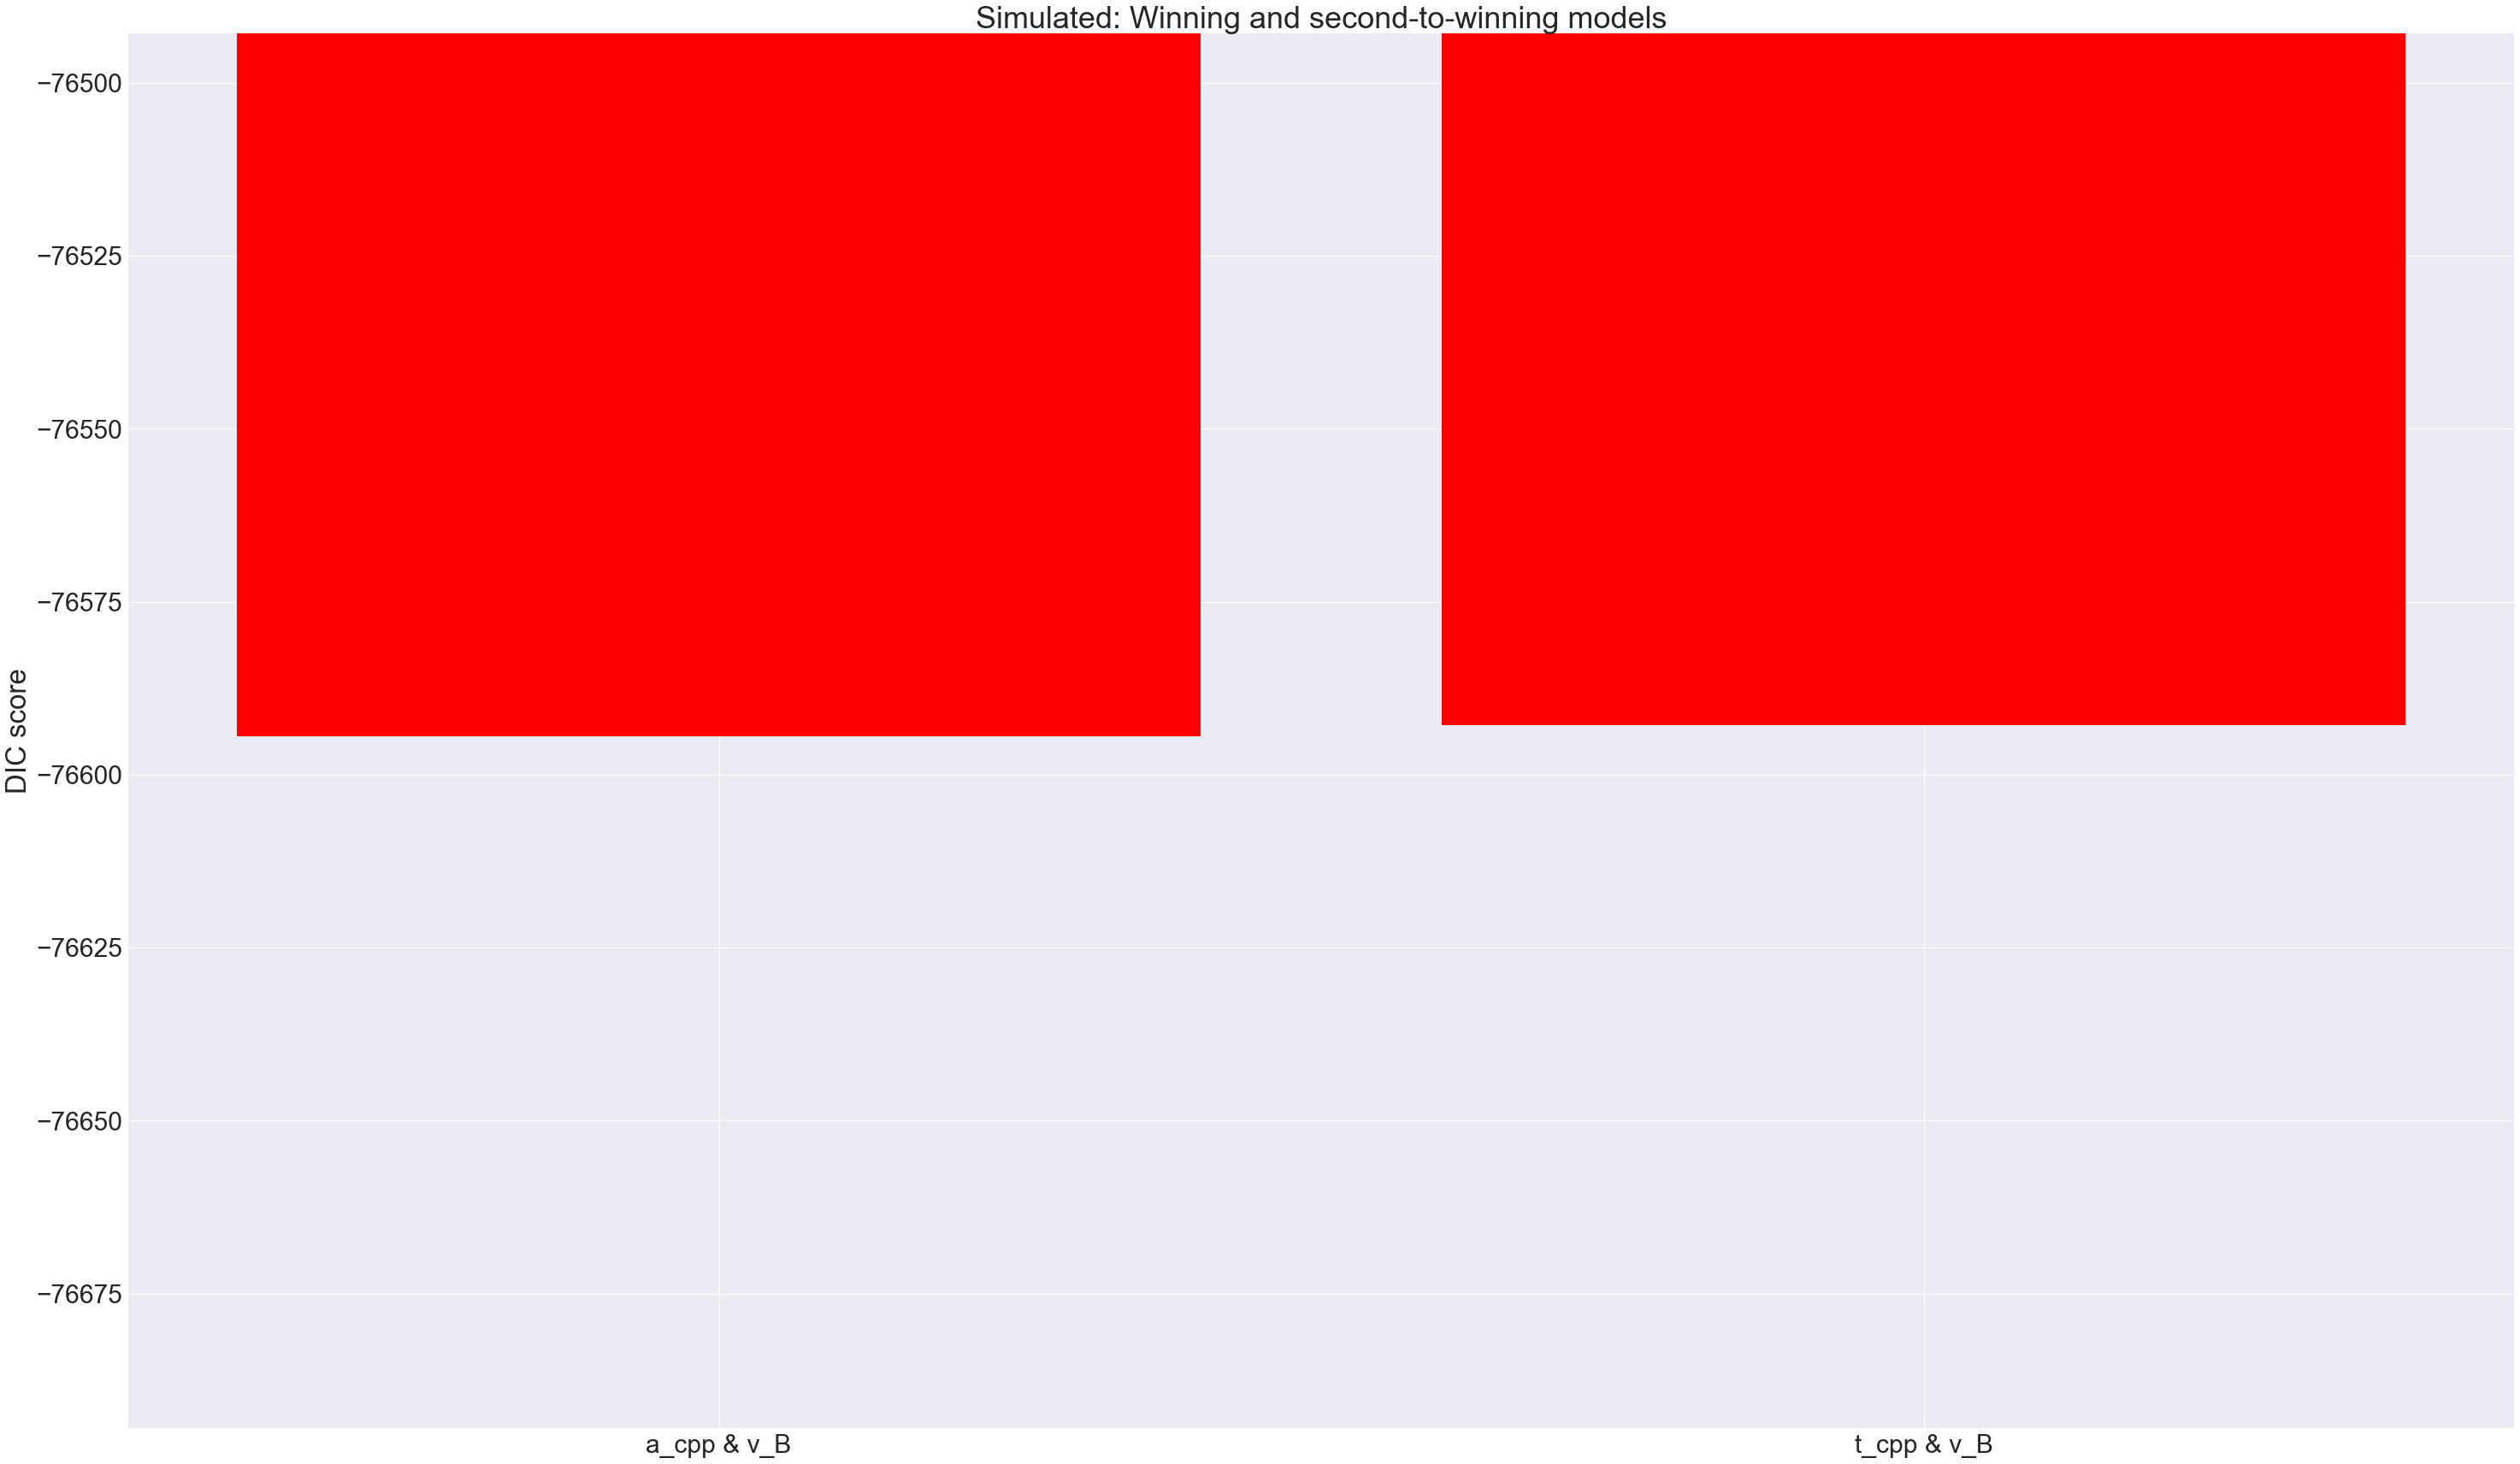

In [13]:
fig, ax = plt.subplots(figsize=(50,30))
ax.bar([m_names[1],m_names[3]], [dics[1],dics[3]], color='r')
plt.ylim(dics[1] - 100, dics[3] + 100)
plt.ylabel('DIC score')
plt.title('Simulated: Winning and second-to-winning models')

In [12]:
diff_first_second = a_cpp_v_B_sim_reg.dic - t_cpp_v_B_sim_reg.dic
print(diff_first_second)

-1.54494105717


# Plot posteriors of regression coefficients

Text(0.5,0,'$\\beta_{v\\textasciitilde B}$')

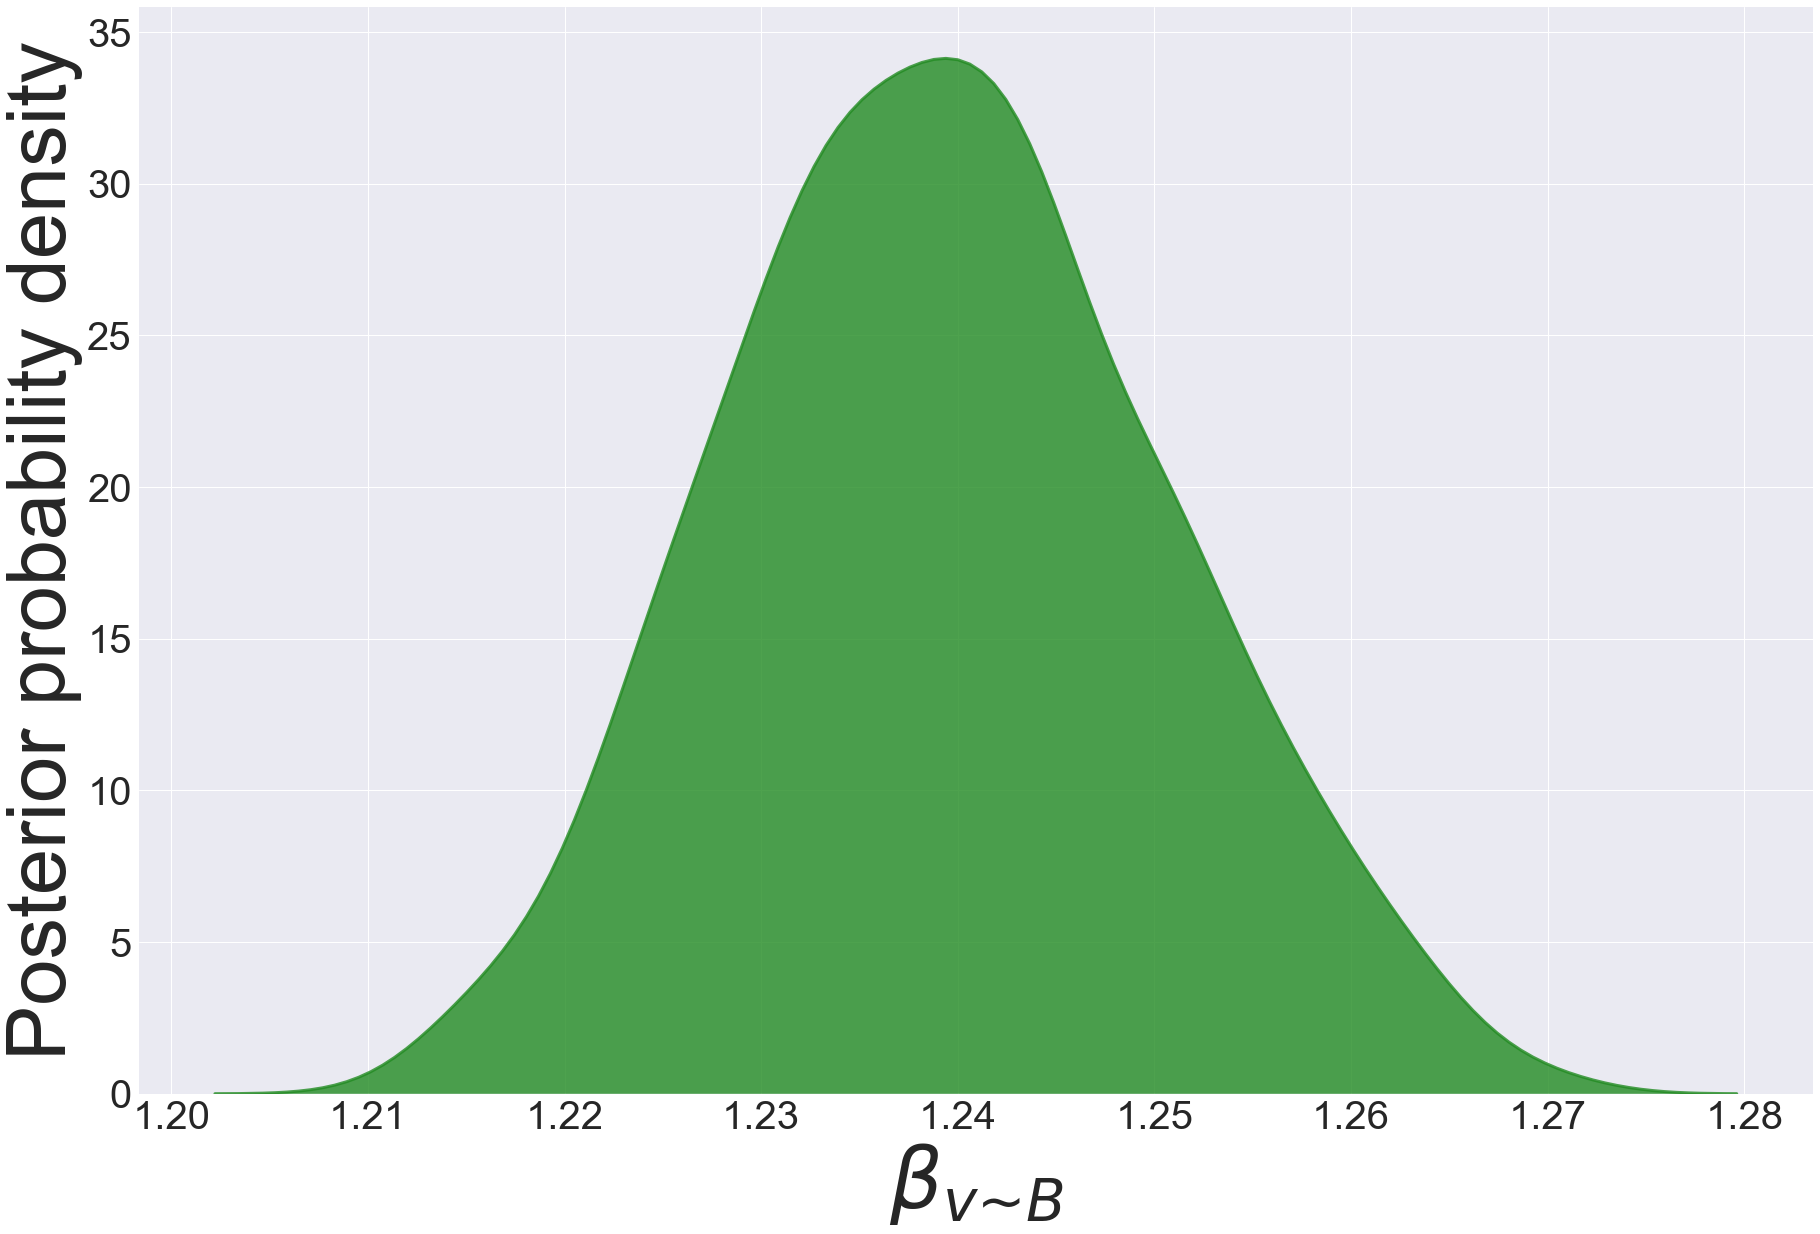

In [16]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(v_B_gen.trace(), hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{a\\textasciitilde \\Omega}$')

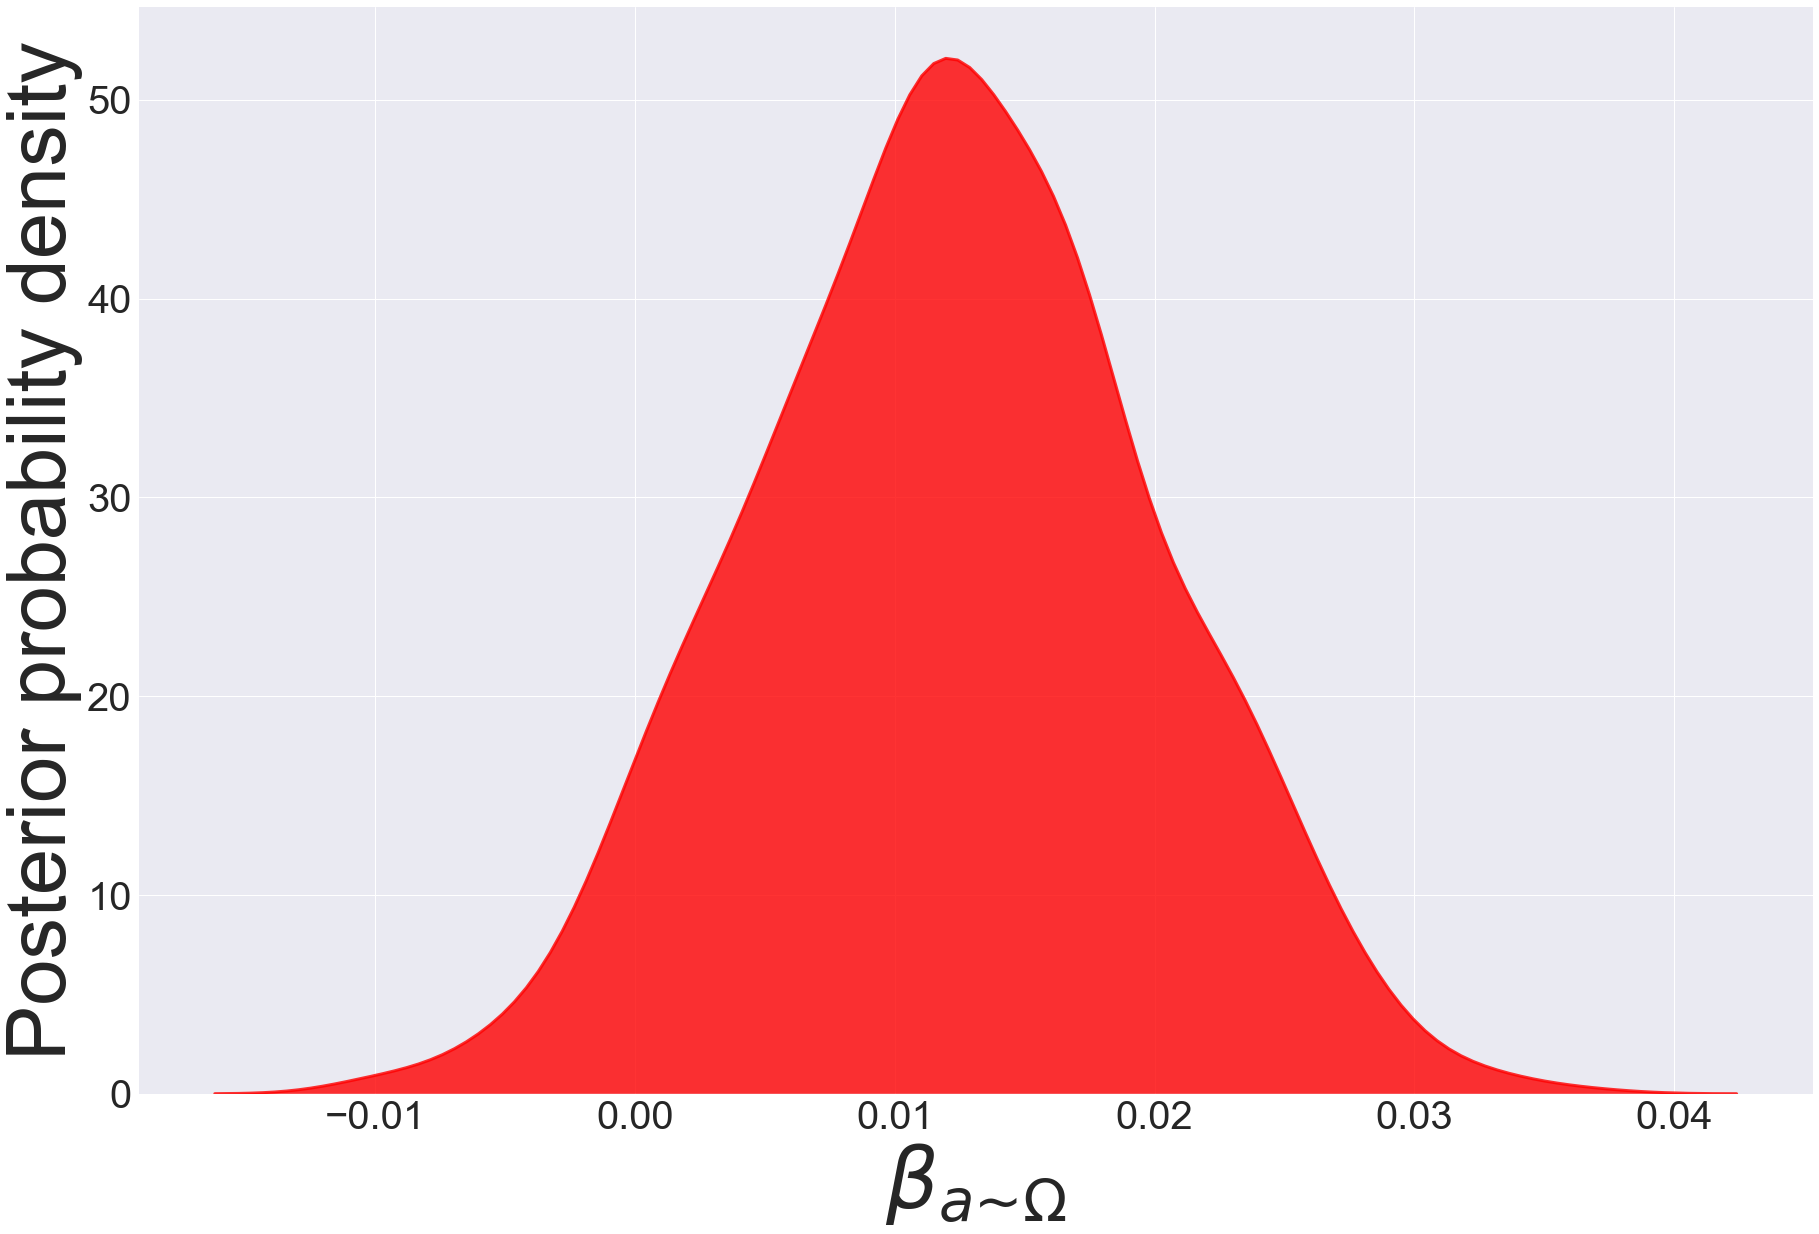

In [17]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(a_cpp_gen.trace(), hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{v\\textasciitilde B}$')

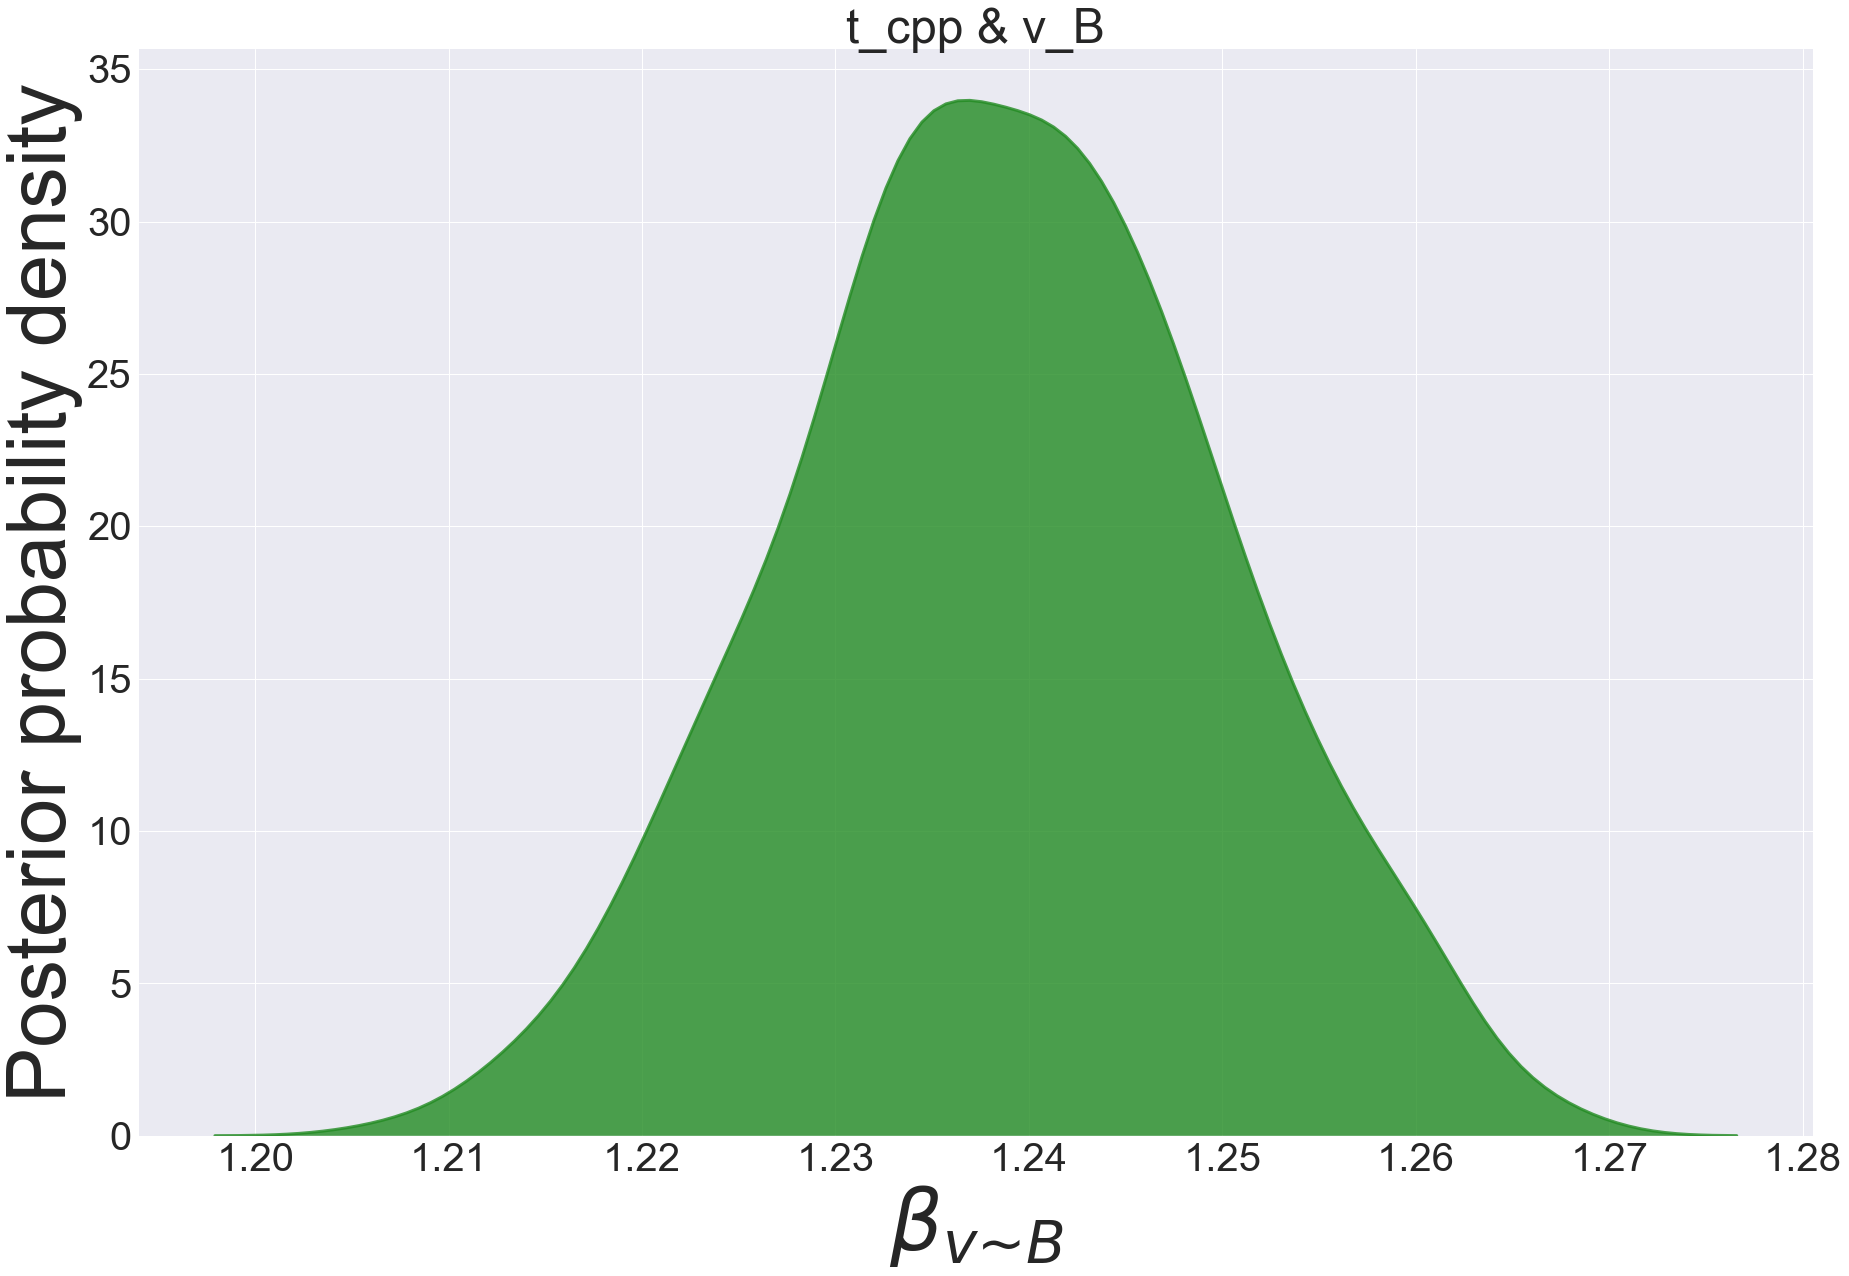

In [18]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(v_B_sec.trace(), hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.title('t_cpp & v_B')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{t\\textasciitilde \\Omega}$')

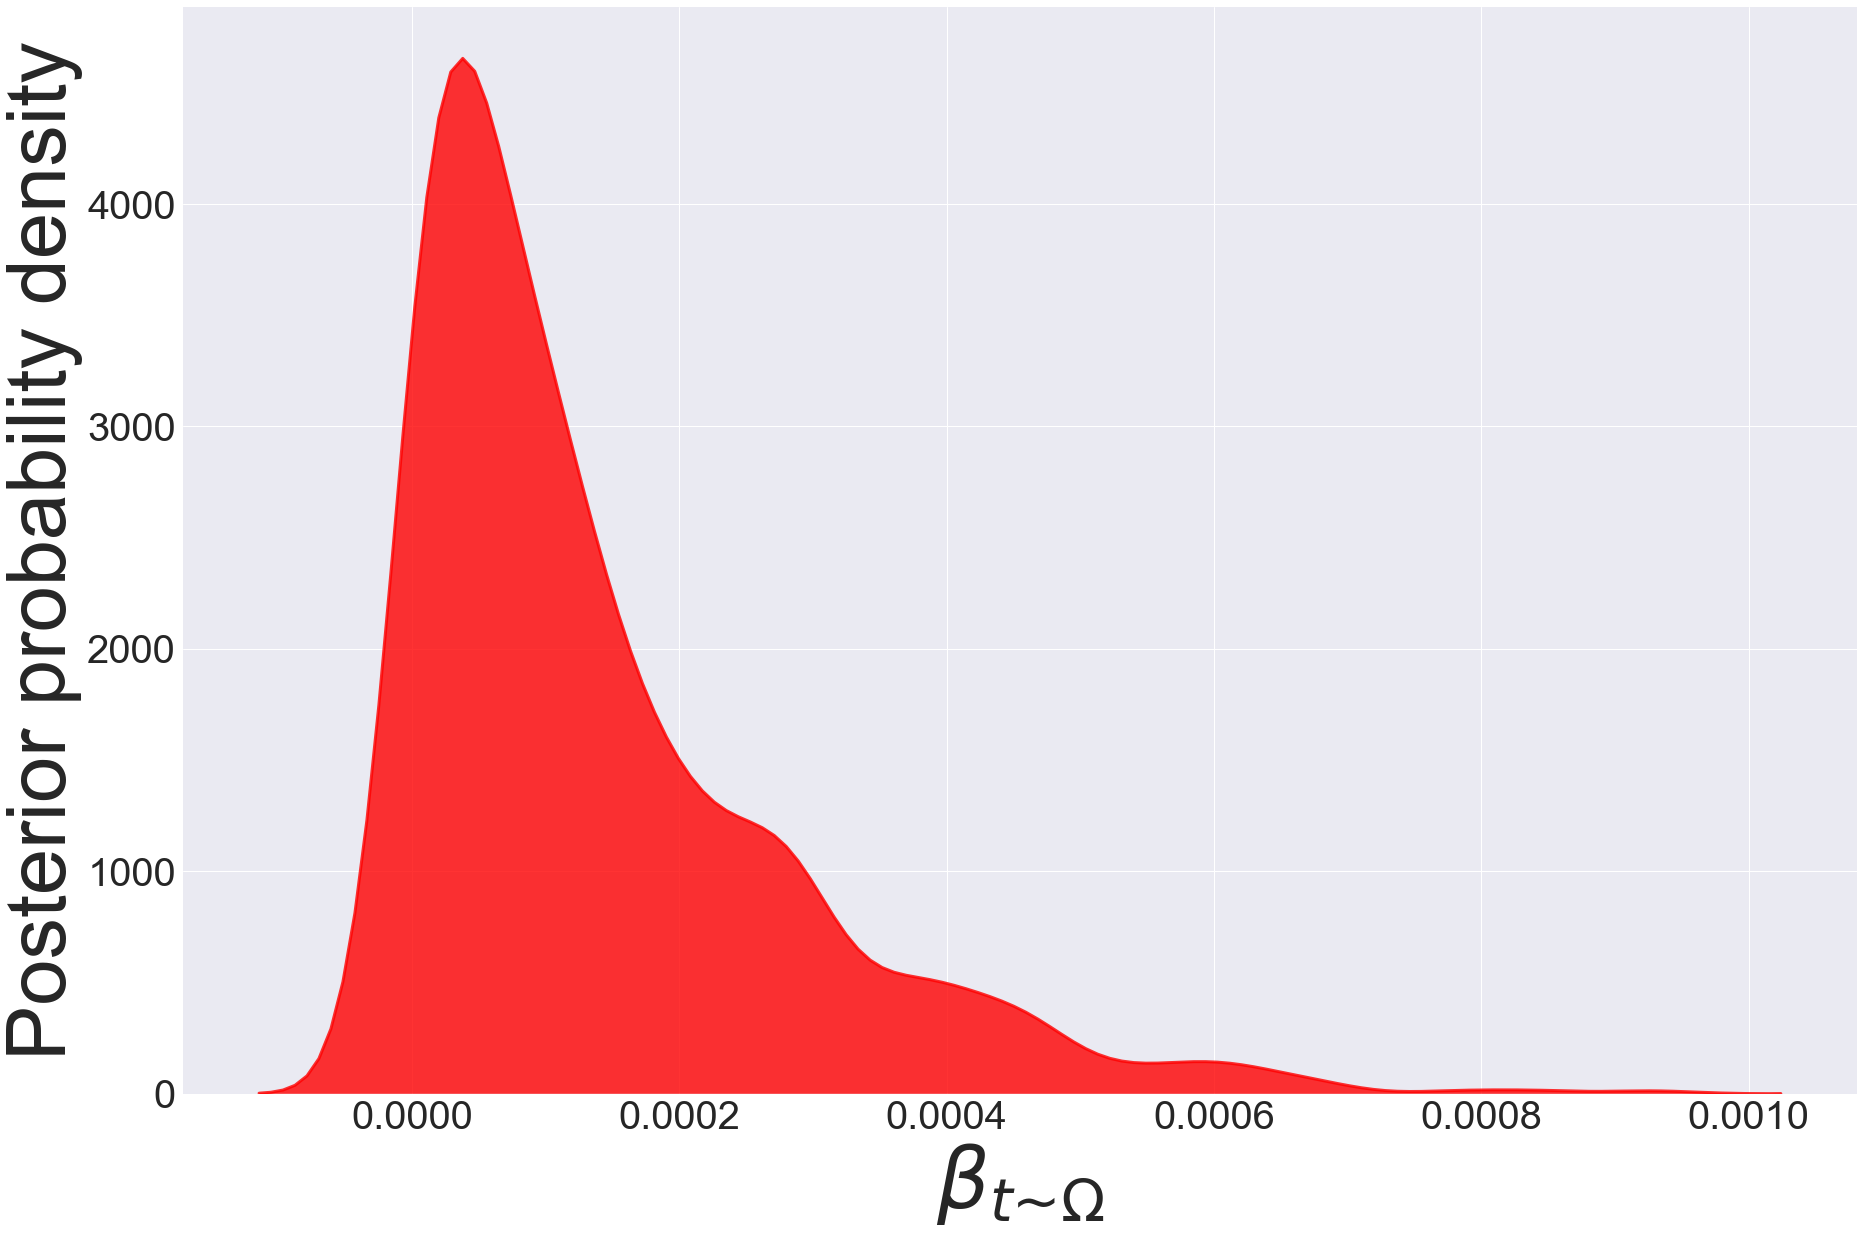

In [19]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))
sns.distplot(t_cpp_sec.trace(), hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,                                                                                                'alpha': .8})
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')